In [105]:
suppressMessages(library(data.table))
suppressMessages(library(dplyr))
suppressMessages(library(stringr))

suppressMessages(library(RColorBrewer))
suppressMessages(library(car))
suppressMessages(library(plotly))
suppressMessages(library(crosstalk))
suppressMessages(library(ellipsis))
suppressMessages(library(Rtsne))
suppressMessages(library(ggrepel))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(tidyverse))
library(pheatmap)
library(NMF)

In [106]:
results.dir = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC_ES/Results"


In [107]:
# Grep onlu results that end in "results"
result_files = list.files(results.dir, 
           pattern = "\\.results$")
length(result_files)

[1] 18060

In [108]:
rna_color = colorRampPalette(c("white", "#59b4a2"))(25)
atac_color =  colorRampPalette(c("white", "#036EB8"))(25)
ac_color =  colorRampPalette(c("white", "#2EA7E0"))(25)
me3_color =  colorRampPalette(c("white", "#956134"))(25)

celltypes = c('aCM','Adipocyte','Endocardial','Endothelial','Epicardial','Fibroblast',
'Lymphoid','Myeloid','Neuronal','Pericyte','SM','vCM')

# Load data

In [109]:
setwd(results.dir)
results_combined <- data.frame()
for (x in result_files){
    file = x
    # CVDK_Format
    trait <- str_split_fixed(x, '_hg19', n=2)[1]
    # FinGenn_Format
    trait = gsub('.gz', '', trait)
    
    celltype <- str_split_fixed(x, '_hg19.', n=2)[2]
    celltype <- str_split_fixed(celltype, '.results', n=2)[1]
    message("Processing: ", celltype, " - ", trait)
    result <- fread(x)
    result <- result[1,c(5,6,7,8,9,10)]
    result$file <- file
    result$trait <- trait
    result$celltype <- celltype
    results_combined <- rbind(results_combined, result) 
}

Processing: aCM--E1 - 0321_asat_bgen_stats

Processing: aCM--E2 - 0321_asat_bgen_stats

Processing: aCM--E3 - 0321_asat_bgen_stats

Processing: aCM--E4 - 0321_asat_bgen_stats

Processing: aCM--E5 - 0321_asat_bgen_stats

Processing: Adipocyte--E1 - 0321_asat_bgen_stats

Processing: Adipocyte--E2 - 0321_asat_bgen_stats

Processing: Adipocyte--E3 - 0321_asat_bgen_stats

Processing: Adipocyte--E4 - 0321_asat_bgen_stats

Processing: Adipocyte--E5 - 0321_asat_bgen_stats

Processing: Endocardial--E1 - 0321_asat_bgen_stats

Processing: Endocardial--E2 - 0321_asat_bgen_stats

Processing: Endocardial--E3 - 0321_asat_bgen_stats

Processing: Endocardial--E4 - 0321_asat_bgen_stats

Processing: Endocardial--E5 - 0321_asat_bgen_stats

Processing: Endothelial--E1 - 0321_asat_bgen_stats

Processing: Endothelial--E2 - 0321_asat_bgen_stats

Processing: Endothelial--E3 - 0321_asat_bgen_stats

Processing: Endothelial--E4 - 0321_asat_bgen_stats

Processing: Endothelial--E5 - 0321_asat_bgen_stats

Processing

Processing: Myeloid--E2 - 0321_asat_Male_bgen_stats

Processing: Myeloid--E3 - 0321_asat_Male_bgen_stats

Processing: Myeloid--E4 - 0321_asat_Male_bgen_stats

Processing: Myeloid--E5 - 0321_asat_Male_bgen_stats

Processing: Neuronal--E1 - 0321_asat_Male_bgen_stats

Processing: Neuronal--E2 - 0321_asat_Male_bgen_stats

Processing: Neuronal--E3 - 0321_asat_Male_bgen_stats

Processing: Neuronal--E4 - 0321_asat_Male_bgen_stats

Processing: Neuronal--E5 - 0321_asat_Male_bgen_stats

Processing: Pericyte--E1 - 0321_asat_Male_bgen_stats

Processing: Pericyte--E2 - 0321_asat_Male_bgen_stats

Processing: Pericyte--E3 - 0321_asat_Male_bgen_stats

Processing: Pericyte--E4 - 0321_asat_Male_bgen_stats

Processing: Pericyte--E5 - 0321_asat_Male_bgen_stats

Processing: SM--E1 - 0321_asat_Male_bgen_stats

Processing: SM--E2 - 0321_asat_Male_bgen_stats

Processing: SM--E3 - 0321_asat_Male_bgen_stats

Processing: SM--E4 - 0321_asat_Male_bgen_stats

Processing: SM--E5 - 0321_asat_Male_bgen_stats

Processi

Processing: vCM--E4 - 0321_asatadjbmi3_Female_bgen_stats

Processing: vCM--E5 - 0321_asatadjbmi3_Female_bgen_stats

Processing: aCM--E1 - 0321_asatadjbmi3_Male_bgen_stats

Processing: aCM--E2 - 0321_asatadjbmi3_Male_bgen_stats

Processing: aCM--E3 - 0321_asatadjbmi3_Male_bgen_stats

Processing: aCM--E4 - 0321_asatadjbmi3_Male_bgen_stats

Processing: aCM--E5 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Adipocyte--E1 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Adipocyte--E2 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Adipocyte--E3 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Adipocyte--E4 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Adipocyte--E5 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Endocardial--E1 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Endocardial--E2 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Endocardial--E3 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Endocardial--E4 - 0321_asatadjbmi3_Male_bgen_stats

Processing: Endocardial--E5 - 0321_asa

Processing: Endothelial--E2 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Endothelial--E3 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Endothelial--E4 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Endothelial--E5 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Epicardial--E1 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Epicardial--E2 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Epicardial--E3 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Epicardial--E4 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Epicardial--E5 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Fibroblast--E1 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Fibroblast--E2 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Fibroblast--E3 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Fibroblast--E4 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Fibroblast--E5 - 0321_asatGfatRatio_Female_bgen_stats

Processing: Lymphoid--E1 - 0321_asatGfatRatio_Female_bgen_

Processing: Lymphoid--E4 - 0321_gfat_bgen_stats

Processing: Lymphoid--E5 - 0321_gfat_bgen_stats

Processing: Myeloid--E1 - 0321_gfat_bgen_stats

Processing: Myeloid--E2 - 0321_gfat_bgen_stats

Processing: Myeloid--E3 - 0321_gfat_bgen_stats

Processing: Myeloid--E4 - 0321_gfat_bgen_stats

Processing: Myeloid--E5 - 0321_gfat_bgen_stats

Processing: Neuronal--E1 - 0321_gfat_bgen_stats

Processing: Neuronal--E2 - 0321_gfat_bgen_stats

Processing: Neuronal--E3 - 0321_gfat_bgen_stats

Processing: Neuronal--E4 - 0321_gfat_bgen_stats

Processing: Neuronal--E5 - 0321_gfat_bgen_stats

Processing: Pericyte--E1 - 0321_gfat_bgen_stats

Processing: Pericyte--E2 - 0321_gfat_bgen_stats

Processing: Pericyte--E3 - 0321_gfat_bgen_stats

Processing: Pericyte--E4 - 0321_gfat_bgen_stats

Processing: Pericyte--E5 - 0321_gfat_bgen_stats

Processing: SM--E1 - 0321_gfat_bgen_stats

Processing: SM--E2 - 0321_gfat_bgen_stats

Processing: SM--E3 - 0321_gfat_bgen_stats

Processing: SM--E4 - 0321_gfat_bgen_stats



Processing: Adipocyte--E4 - 0321_gfatadjbmi3_bgen_stats

Processing: Adipocyte--E5 - 0321_gfatadjbmi3_bgen_stats

Processing: Endocardial--E1 - 0321_gfatadjbmi3_bgen_stats

Processing: Endocardial--E2 - 0321_gfatadjbmi3_bgen_stats

Processing: Endocardial--E3 - 0321_gfatadjbmi3_bgen_stats

Processing: Endocardial--E4 - 0321_gfatadjbmi3_bgen_stats

Processing: Endocardial--E5 - 0321_gfatadjbmi3_bgen_stats

Processing: Endothelial--E1 - 0321_gfatadjbmi3_bgen_stats

Processing: Endothelial--E2 - 0321_gfatadjbmi3_bgen_stats

Processing: Endothelial--E3 - 0321_gfatadjbmi3_bgen_stats

Processing: Endothelial--E4 - 0321_gfatadjbmi3_bgen_stats

Processing: Endothelial--E5 - 0321_gfatadjbmi3_bgen_stats

Processing: Epicardial--E1 - 0321_gfatadjbmi3_bgen_stats

Processing: Epicardial--E2 - 0321_gfatadjbmi3_bgen_stats

Processing: Epicardial--E3 - 0321_gfatadjbmi3_bgen_stats

Processing: Epicardial--E4 - 0321_gfatadjbmi3_bgen_stats

Processing: Epicardial--E5 - 0321_gfatadjbmi3_bgen_stats

Proces

Processing: Fibroblast--E1 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Fibroblast--E2 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Fibroblast--E3 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Fibroblast--E4 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Fibroblast--E5 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Lymphoid--E1 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Lymphoid--E2 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Lymphoid--E3 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Lymphoid--E4 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Lymphoid--E5 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Myeloid--E1 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Myeloid--E2 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Myeloid--E3 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Myeloid--E4 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Myeloid--E5 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Neuronal--E1 - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Neurona

Processing: aCM--E1 - 0321_vat_Male_bgen_stats

Processing: aCM--E2 - 0321_vat_Male_bgen_stats

Processing: aCM--E3 - 0321_vat_Male_bgen_stats

Processing: aCM--E4 - 0321_vat_Male_bgen_stats

Processing: aCM--E5 - 0321_vat_Male_bgen_stats

Processing: Adipocyte--E1 - 0321_vat_Male_bgen_stats

Processing: Adipocyte--E2 - 0321_vat_Male_bgen_stats

Processing: Adipocyte--E3 - 0321_vat_Male_bgen_stats

Processing: Adipocyte--E4 - 0321_vat_Male_bgen_stats

Processing: Adipocyte--E5 - 0321_vat_Male_bgen_stats

Processing: Endocardial--E1 - 0321_vat_Male_bgen_stats

Processing: Endocardial--E2 - 0321_vat_Male_bgen_stats

Processing: Endocardial--E3 - 0321_vat_Male_bgen_stats

Processing: Endocardial--E4 - 0321_vat_Male_bgen_stats

Processing: Endocardial--E5 - 0321_vat_Male_bgen_stats

Processing: Endothelial--E1 - 0321_vat_Male_bgen_stats

Processing: Endothelial--E2 - 0321_vat_Male_bgen_stats

Processing: Endothelial--E3 - 0321_vat_Male_bgen_stats

Processing: Endothelial--E4 - 0321_vat_Mal

Processing: Fibroblast--E5 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Lymphoid--E1 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Lymphoid--E2 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Lymphoid--E3 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Lymphoid--E4 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Lymphoid--E5 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Myeloid--E1 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Myeloid--E2 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Myeloid--E3 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Myeloid--E4 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Myeloid--E5 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Neuronal--E1 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Neuronal--E2 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Neuronal--E3 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Neuronal--E4 - 0321_vatadjbmi3_Female_bgen_stats

Processing: Neuronal--E5 - 0321_vatadjbmi3_Female_bgen_stats

Processing:

Processing: Pericyte--E4 - 0321_vatAsatRatio_bgen_stats

Processing: Pericyte--E5 - 0321_vatAsatRatio_bgen_stats

Processing: SM--E1 - 0321_vatAsatRatio_bgen_stats

Processing: SM--E2 - 0321_vatAsatRatio_bgen_stats

Processing: SM--E3 - 0321_vatAsatRatio_bgen_stats

Processing: SM--E4 - 0321_vatAsatRatio_bgen_stats

Processing: SM--E5 - 0321_vatAsatRatio_bgen_stats

Processing: vCM--E1 - 0321_vatAsatRatio_bgen_stats

Processing: vCM--E2 - 0321_vatAsatRatio_bgen_stats

Processing: vCM--E3 - 0321_vatAsatRatio_bgen_stats

Processing: vCM--E4 - 0321_vatAsatRatio_bgen_stats

Processing: vCM--E5 - 0321_vatAsatRatio_bgen_stats

Processing: aCM--E1 - 0321_vatAsatRatio_Female_bgen_stats

Processing: aCM--E2 - 0321_vatAsatRatio_Female_bgen_stats

Processing: aCM--E3 - 0321_vatAsatRatio_Female_bgen_stats

Processing: aCM--E4 - 0321_vatAsatRatio_Female_bgen_stats

Processing: aCM--E5 - 0321_vatAsatRatio_Female_bgen_stats

Processing: Adipocyte--E1 - 0321_vatAsatRatio_Female_bgen_stats

Processing:

Processing: aCM--E3 - 0321_vatGfatRatio_bgen_stats

Processing: aCM--E4 - 0321_vatGfatRatio_bgen_stats

Processing: aCM--E5 - 0321_vatGfatRatio_bgen_stats

Processing: Adipocyte--E1 - 0321_vatGfatRatio_bgen_stats

Processing: Adipocyte--E2 - 0321_vatGfatRatio_bgen_stats

Processing: Adipocyte--E3 - 0321_vatGfatRatio_bgen_stats

Processing: Adipocyte--E4 - 0321_vatGfatRatio_bgen_stats

Processing: Adipocyte--E5 - 0321_vatGfatRatio_bgen_stats

Processing: Endocardial--E1 - 0321_vatGfatRatio_bgen_stats

Processing: Endocardial--E2 - 0321_vatGfatRatio_bgen_stats

Processing: Endocardial--E3 - 0321_vatGfatRatio_bgen_stats

Processing: Endocardial--E4 - 0321_vatGfatRatio_bgen_stats

Processing: Endocardial--E5 - 0321_vatGfatRatio_bgen_stats

Processing: Endothelial--E1 - 0321_vatGfatRatio_bgen_stats

Processing: Endothelial--E2 - 0321_vatGfatRatio_bgen_stats

Processing: Endothelial--E3 - 0321_vatGfatRatio_bgen_stats

Processing: Endothelial--E4 - 0321_vatGfatRatio_bgen_stats

Processing: En

Processing: Endothelial--E4 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Endothelial--E5 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial--E1 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial--E2 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial--E3 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial--E4 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial--E5 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast--E1 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast--E2 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast--E3 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast--E4 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast--E5 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Lymphoid--E1 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Lymphoid--E2 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Lymphoid--E3 - 0321_vatGfatRatio_Male_bgen_stats

Processing: Lymphoid--E4 - 0321_vatGfatRatio

Processing: Lymphoid--E4 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Lymphoid--E5 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Myeloid--E1 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Myeloid--E2 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Myeloid--E3 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Myeloid--E4 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Myeloid--E5 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Neuronal--E1 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Neuronal--E2 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Neuronal--E3 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Neuronal--E4 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Neuronal--E5 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Pericyte--E1 - CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf

Processing: Peric

Processing: Neuronal--E1 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Neuronal--E2 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Neuronal--E3 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Neuronal--E4 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Neuronal--E5 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Pericyte--E1 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Pericyte--E2 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Pericyte--E3 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Pericyte--E4 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: Pericyte--E5 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: SM--E1 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: SM--E2 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: SM--E3 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: SM--E4 - CAD_GWAS_primary_discovery_meta_w_hm_rsids

Processing: SM--E5 - CAD_GWAS_

Processing: vCM--E5 - CAD_GWAS_SEX_STRATIFIED_MALE

Processing: aCM--E1 - CAS.EUR.MVP.Circulation2023

Processing: aCM--E2 - CAS.EUR.MVP.Circulation2023

Processing: aCM--E3 - CAS.EUR.MVP.Circulation2023

Processing: aCM--E4 - CAS.EUR.MVP.Circulation2023

Processing: aCM--E5 - CAS.EUR.MVP.Circulation2023

Processing: Adipocyte--E1 - CAS.EUR.MVP.Circulation2023

Processing: Adipocyte--E2 - CAS.EUR.MVP.Circulation2023

Processing: Adipocyte--E3 - CAS.EUR.MVP.Circulation2023

Processing: Adipocyte--E4 - CAS.EUR.MVP.Circulation2023

Processing: Adipocyte--E5 - CAS.EUR.MVP.Circulation2023

Processing: Endocardial--E1 - CAS.EUR.MVP.Circulation2023

Processing: Endocardial--E2 - CAS.EUR.MVP.Circulation2023

Processing: Endocardial--E3 - CAS.EUR.MVP.Circulation2023

Processing: Endocardial--E4 - CAS.EUR.MVP.Circulation2023

Processing: Endocardial--E5 - CAS.EUR.MVP.Circulation2023

Processing: Endothelial--E1 - CAS.EUR.MVP.Circulation2023

Processing: Endothelial--E2 - CAS.EUR.MVP.Circulation2

Processing: Epicardial--E1 - CLEANED.MVP.EUR.PAD

Processing: Epicardial--E2 - CLEANED.MVP.EUR.PAD

Processing: Epicardial--E3 - CLEANED.MVP.EUR.PAD

Processing: Epicardial--E4 - CLEANED.MVP.EUR.PAD

Processing: Epicardial--E5 - CLEANED.MVP.EUR.PAD

Processing: Fibroblast--E1 - CLEANED.MVP.EUR.PAD

Processing: Fibroblast--E2 - CLEANED.MVP.EUR.PAD

Processing: Fibroblast--E3 - CLEANED.MVP.EUR.PAD

Processing: Fibroblast--E4 - CLEANED.MVP.EUR.PAD

Processing: Fibroblast--E5 - CLEANED.MVP.EUR.PAD

Processing: Lymphoid--E1 - CLEANED.MVP.EUR.PAD

Processing: Lymphoid--E2 - CLEANED.MVP.EUR.PAD

Processing: Lymphoid--E3 - CLEANED.MVP.EUR.PAD

Processing: Lymphoid--E4 - CLEANED.MVP.EUR.PAD

Processing: Lymphoid--E5 - CLEANED.MVP.EUR.PAD

Processing: Myeloid--E1 - CLEANED.MVP.EUR.PAD

Processing: Myeloid--E2 - CLEANED.MVP.EUR.PAD

Processing: Myeloid--E3 - CLEANED.MVP.EUR.PAD

Processing: Myeloid--E4 - CLEANED.MVP.EUR.PAD

Processing: Myeloid--E5 - CLEANED.MVP.EUR.PAD

Processing: Neuronal--E1 

Processing: Adipocyte--E2 - finngen_R11_AUTOIMMUNE

Processing: Adipocyte--E3 - finngen_R11_AUTOIMMUNE

Processing: Adipocyte--E4 - finngen_R11_AUTOIMMUNE

Processing: Adipocyte--E5 - finngen_R11_AUTOIMMUNE

Processing: Endocardial--E1 - finngen_R11_AUTOIMMUNE

Processing: Endocardial--E2 - finngen_R11_AUTOIMMUNE

Processing: Endocardial--E3 - finngen_R11_AUTOIMMUNE

Processing: Endocardial--E4 - finngen_R11_AUTOIMMUNE

Processing: Endocardial--E5 - finngen_R11_AUTOIMMUNE

Processing: Endothelial--E1 - finngen_R11_AUTOIMMUNE

Processing: Endothelial--E2 - finngen_R11_AUTOIMMUNE

Processing: Endothelial--E3 - finngen_R11_AUTOIMMUNE

Processing: Endothelial--E4 - finngen_R11_AUTOIMMUNE

Processing: Endothelial--E5 - finngen_R11_AUTOIMMUNE

Processing: Epicardial--E1 - finngen_R11_AUTOIMMUNE

Processing: Epicardial--E2 - finngen_R11_AUTOIMMUNE

Processing: Epicardial--E3 - finngen_R11_AUTOIMMUNE

Processing: Epicardial--E4 - finngen_R11_AUTOIMMUNE

Processing: Epicardial--E5 - finngen_R11

Processing: Pericyte--E1 - finngen_R11_CARDIAC_ARRHYTM

Processing: Pericyte--E2 - finngen_R11_CARDIAC_ARRHYTM

Processing: Pericyte--E3 - finngen_R11_CARDIAC_ARRHYTM

Processing: Pericyte--E4 - finngen_R11_CARDIAC_ARRHYTM

Processing: Pericyte--E5 - finngen_R11_CARDIAC_ARRHYTM

Processing: SM--E1 - finngen_R11_CARDIAC_ARRHYTM

Processing: SM--E2 - finngen_R11_CARDIAC_ARRHYTM

Processing: SM--E3 - finngen_R11_CARDIAC_ARRHYTM

Processing: SM--E4 - finngen_R11_CARDIAC_ARRHYTM

Processing: SM--E5 - finngen_R11_CARDIAC_ARRHYTM

Processing: vCM--E1 - finngen_R11_CARDIAC_ARRHYTM

Processing: vCM--E2 - finngen_R11_CARDIAC_ARRHYTM

Processing: vCM--E3 - finngen_R11_CARDIAC_ARRHYTM

Processing: vCM--E4 - finngen_R11_CARDIAC_ARRHYTM

Processing: vCM--E5 - finngen_R11_CARDIAC_ARRHYTM

Processing: aCM--E1 - finngen_R11_CARDIOMYOPATHY_DRUGS_OTHER_EXTER_AGENTS

Processing: aCM--E2 - finngen_R11_CARDIOMYOPATHY_DRUGS_OTHER_EXTER_AGENTS

Processing: aCM--E3 - finngen_R11_CARDIOMYOPATHY_DRUGS_OTHER_EXTE

Processing: Pericyte--E1 - finngen_R11_CONGEN_HEART_ARTER

Processing: Pericyte--E2 - finngen_R11_CONGEN_HEART_ARTER

Processing: Pericyte--E3 - finngen_R11_CONGEN_HEART_ARTER

Processing: Pericyte--E4 - finngen_R11_CONGEN_HEART_ARTER

Processing: Pericyte--E5 - finngen_R11_CONGEN_HEART_ARTER

Processing: SM--E1 - finngen_R11_CONGEN_HEART_ARTER

Processing: SM--E2 - finngen_R11_CONGEN_HEART_ARTER

Processing: SM--E3 - finngen_R11_CONGEN_HEART_ARTER

Processing: SM--E4 - finngen_R11_CONGEN_HEART_ARTER

Processing: SM--E5 - finngen_R11_CONGEN_HEART_ARTER

Processing: vCM--E1 - finngen_R11_CONGEN_HEART_ARTER

Processing: vCM--E2 - finngen_R11_CONGEN_HEART_ARTER

Processing: vCM--E3 - finngen_R11_CONGEN_HEART_ARTER

Processing: vCM--E4 - finngen_R11_CONGEN_HEART_ARTER

Processing: vCM--E5 - finngen_R11_CONGEN_HEART_ARTER

Processing: aCM--E1 - finngen_R11_DM_NEPHROPATHY_EXMORE

Processing: aCM--E2 - finngen_R11_DM_NEPHROPATHY_EXMORE

Processing: aCM--E3 - finngen_R11_DM_NEPHROPATHY_EXMORE


Processing: Adipocyte--E4 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Adipocyte--E5 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endocardial--E1 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endocardial--E2 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endocardial--E3 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endocardial--E4 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endocardial--E5 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endothelial--E1 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endothelial--E2 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endothelial--E3 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endothelial--E4 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Endothelial--E5 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Epicardial--E1 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Epicardial--E2 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Epicardial--E3 - finngen_R11_DM_RETINOPATHY_EXMORE

Processing: Epicardial--E4 - fin

Processing: Myeloid--E5 - finngen_R11_FG_CARDMYO

Processing: Neuronal--E1 - finngen_R11_FG_CARDMYO

Processing: Neuronal--E2 - finngen_R11_FG_CARDMYO

Processing: Neuronal--E3 - finngen_R11_FG_CARDMYO

Processing: Neuronal--E4 - finngen_R11_FG_CARDMYO

Processing: Neuronal--E5 - finngen_R11_FG_CARDMYO

Processing: Pericyte--E1 - finngen_R11_FG_CARDMYO

Processing: Pericyte--E2 - finngen_R11_FG_CARDMYO

Processing: Pericyte--E3 - finngen_R11_FG_CARDMYO

Processing: Pericyte--E4 - finngen_R11_FG_CARDMYO

Processing: Pericyte--E5 - finngen_R11_FG_CARDMYO

Processing: SM--E1 - finngen_R11_FG_CARDMYO

Processing: SM--E2 - finngen_R11_FG_CARDMYO

Processing: SM--E3 - finngen_R11_FG_CARDMYO

Processing: SM--E4 - finngen_R11_FG_CARDMYO

Processing: SM--E5 - finngen_R11_FG_CARDMYO

Processing: vCM--E1 - finngen_R11_FG_CARDMYO

Processing: vCM--E2 - finngen_R11_FG_CARDMYO

Processing: vCM--E3 - finngen_R11_FG_CARDMYO

Processing: vCM--E4 - finngen_R11_FG_CARDMYO

Processing: vCM--E5 - finngen_R

Processing: Fibroblast--E4 - finngen_R11_FG_OTHHEART

Processing: Fibroblast--E5 - finngen_R11_FG_OTHHEART

Processing: Lymphoid--E1 - finngen_R11_FG_OTHHEART

Processing: Lymphoid--E2 - finngen_R11_FG_OTHHEART

Processing: Lymphoid--E3 - finngen_R11_FG_OTHHEART

Processing: Lymphoid--E4 - finngen_R11_FG_OTHHEART

Processing: Lymphoid--E5 - finngen_R11_FG_OTHHEART

Processing: Myeloid--E1 - finngen_R11_FG_OTHHEART

Processing: Myeloid--E2 - finngen_R11_FG_OTHHEART

Processing: Myeloid--E3 - finngen_R11_FG_OTHHEART

Processing: Myeloid--E4 - finngen_R11_FG_OTHHEART

Processing: Myeloid--E5 - finngen_R11_FG_OTHHEART

Processing: Neuronal--E1 - finngen_R11_FG_OTHHEART

Processing: Neuronal--E2 - finngen_R11_FG_OTHHEART

Processing: Neuronal--E3 - finngen_R11_FG_OTHHEART

Processing: Neuronal--E4 - finngen_R11_FG_OTHHEART

Processing: Neuronal--E5 - finngen_R11_FG_OTHHEART

Processing: Pericyte--E1 - finngen_R11_FG_OTHHEART

Processing: Pericyte--E2 - finngen_R11_FG_OTHHEART

Processing: P

Processing: Adipocyte--E1 - finngen_R11_I9_ABAORTANEUR

Processing: Adipocyte--E2 - finngen_R11_I9_ABAORTANEUR

Processing: Adipocyte--E3 - finngen_R11_I9_ABAORTANEUR

Processing: Adipocyte--E4 - finngen_R11_I9_ABAORTANEUR

Processing: Adipocyte--E5 - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial--E1 - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial--E2 - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial--E3 - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial--E4 - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial--E5 - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial--E1 - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial--E2 - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial--E3 - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial--E4 - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial--E5 - finngen_R11_I9_ABAORTANEUR

Processing: Epicardial--E1 - finngen_R11_I9_ABAORTANEUR

Processing: Epicardial--E2 - finngen_R11_I9_ABAORTANEUR

Processing: Epicardial--E3

Processing: Pericyte--E1 - finngen_R11_I9_AF

Processing: Pericyte--E2 - finngen_R11_I9_AF

Processing: Pericyte--E3 - finngen_R11_I9_AF

Processing: Pericyte--E4 - finngen_R11_I9_AF

Processing: Pericyte--E5 - finngen_R11_I9_AF

Processing: SM--E1 - finngen_R11_I9_AF

Processing: SM--E2 - finngen_R11_I9_AF

Processing: SM--E3 - finngen_R11_I9_AF

Processing: SM--E4 - finngen_R11_I9_AF

Processing: SM--E5 - finngen_R11_I9_AF

Processing: vCM--E1 - finngen_R11_I9_AF

Processing: vCM--E2 - finngen_R11_I9_AF

Processing: vCM--E3 - finngen_R11_I9_AF

Processing: vCM--E4 - finngen_R11_I9_AF

Processing: vCM--E5 - finngen_R11_I9_AF

Processing: aCM--E1 - finngen_R11_I9_ANGINA

Processing: aCM--E2 - finngen_R11_I9_ANGINA

Processing: aCM--E3 - finngen_R11_I9_ANGINA

Processing: aCM--E4 - finngen_R11_I9_ANGINA

Processing: aCM--E5 - finngen_R11_I9_ANGINA

Processing: Adipocyte--E1 - finngen_R11_I9_ANGINA

Processing: Adipocyte--E2 - finngen_R11_I9_ANGINA

Processing: Adipocyte--E3 - finngen_R1

Processing: Lymphoid--E3 - finngen_R11_I9_AORTANEUR

Processing: Lymphoid--E4 - finngen_R11_I9_AORTANEUR

Processing: Lymphoid--E5 - finngen_R11_I9_AORTANEUR

Processing: Myeloid--E1 - finngen_R11_I9_AORTANEUR

Processing: Myeloid--E2 - finngen_R11_I9_AORTANEUR

Processing: Myeloid--E3 - finngen_R11_I9_AORTANEUR

Processing: Myeloid--E4 - finngen_R11_I9_AORTANEUR

Processing: Myeloid--E5 - finngen_R11_I9_AORTANEUR

Processing: Neuronal--E1 - finngen_R11_I9_AORTANEUR

Processing: Neuronal--E2 - finngen_R11_I9_AORTANEUR

Processing: Neuronal--E3 - finngen_R11_I9_AORTANEUR

Processing: Neuronal--E4 - finngen_R11_I9_AORTANEUR

Processing: Neuronal--E5 - finngen_R11_I9_AORTANEUR

Processing: Pericyte--E1 - finngen_R11_I9_AORTANEUR

Processing: Pericyte--E2 - finngen_R11_I9_AORTANEUR

Processing: Pericyte--E3 - finngen_R11_I9_AORTANEUR

Processing: Pericyte--E4 - finngen_R11_I9_AORTANEUR

Processing: Pericyte--E5 - finngen_R11_I9_AORTANEUR

Processing: SM--E1 - finngen_R11_I9_AORTANEUR

Proc

Processing: Endocardial--E2 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endocardial--E3 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endocardial--E4 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endocardial--E5 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endothelial--E1 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endothelial--E2 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endothelial--E3 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endothelial--E4 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Endothelial--E5 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Epicardial--E1 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Epicardial--E2 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Epicardial--E3 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Epicardial--E4 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Epicardial--E5 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Fibroblast--E1 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Fibroblast--E2 - finngen_R11_I9_ARTEMBTHRLOW

Processing: Fibroblast--E3 - finngen_R11_I9_ARTEMBTHRLOW

Proce

Processing: Neuronal--E4 - finngen_R11_I9_ARTOTH

Processing: Neuronal--E5 - finngen_R11_I9_ARTOTH

Processing: Pericyte--E1 - finngen_R11_I9_ARTOTH

Processing: Pericyte--E2 - finngen_R11_I9_ARTOTH

Processing: Pericyte--E3 - finngen_R11_I9_ARTOTH

Processing: Pericyte--E4 - finngen_R11_I9_ARTOTH

Processing: Pericyte--E5 - finngen_R11_I9_ARTOTH

Processing: SM--E1 - finngen_R11_I9_ARTOTH

Processing: SM--E2 - finngen_R11_I9_ARTOTH

Processing: SM--E3 - finngen_R11_I9_ARTOTH

Processing: SM--E4 - finngen_R11_I9_ARTOTH

Processing: SM--E5 - finngen_R11_I9_ARTOTH

Processing: vCM--E1 - finngen_R11_I9_ARTOTH

Processing: vCM--E2 - finngen_R11_I9_ARTOTH

Processing: vCM--E3 - finngen_R11_I9_ARTOTH

Processing: vCM--E4 - finngen_R11_I9_ARTOTH

Processing: vCM--E5 - finngen_R11_I9_ARTOTH

Processing: aCM--E1 - finngen_R11_I9_ATHSCLE

Processing: aCM--E2 - finngen_R11_I9_ATHSCLE

Processing: aCM--E3 - finngen_R11_I9_ATHSCLE

Processing: aCM--E4 - finngen_R11_I9_ATHSCLE

Processing: aCM--E5 -

Processing: Fibroblast--E4 - finngen_R11_I9_CABG

Processing: Fibroblast--E5 - finngen_R11_I9_CABG

Processing: Lymphoid--E1 - finngen_R11_I9_CABG

Processing: Lymphoid--E2 - finngen_R11_I9_CABG

Processing: Lymphoid--E3 - finngen_R11_I9_CABG

Processing: Lymphoid--E4 - finngen_R11_I9_CABG

Processing: Lymphoid--E5 - finngen_R11_I9_CABG

Processing: Myeloid--E1 - finngen_R11_I9_CABG

Processing: Myeloid--E2 - finngen_R11_I9_CABG

Processing: Myeloid--E3 - finngen_R11_I9_CABG

Processing: Myeloid--E4 - finngen_R11_I9_CABG

Processing: Myeloid--E5 - finngen_R11_I9_CABG

Processing: Neuronal--E1 - finngen_R11_I9_CABG

Processing: Neuronal--E2 - finngen_R11_I9_CABG

Processing: Neuronal--E3 - finngen_R11_I9_CABG

Processing: Neuronal--E4 - finngen_R11_I9_CABG

Processing: Neuronal--E5 - finngen_R11_I9_CABG

Processing: Pericyte--E1 - finngen_R11_I9_CABG

Processing: Pericyte--E2 - finngen_R11_I9_CABG

Processing: Pericyte--E3 - finngen_R11_I9_CABG

Processing: Pericyte--E4 - finngen_R11_I9

Processing: Endocardial--E3 - finngen_R11_I9_CARDMYO

Processing: Endocardial--E4 - finngen_R11_I9_CARDMYO

Processing: Endocardial--E5 - finngen_R11_I9_CARDMYO

Processing: Endothelial--E1 - finngen_R11_I9_CARDMYO

Processing: Endothelial--E2 - finngen_R11_I9_CARDMYO

Processing: Endothelial--E3 - finngen_R11_I9_CARDMYO

Processing: Endothelial--E4 - finngen_R11_I9_CARDMYO

Processing: Endothelial--E5 - finngen_R11_I9_CARDMYO

Processing: Epicardial--E1 - finngen_R11_I9_CARDMYO

Processing: Epicardial--E2 - finngen_R11_I9_CARDMYO

Processing: Epicardial--E3 - finngen_R11_I9_CARDMYO

Processing: Epicardial--E4 - finngen_R11_I9_CARDMYO

Processing: Epicardial--E5 - finngen_R11_I9_CARDMYO

Processing: Fibroblast--E1 - finngen_R11_I9_CARDMYO

Processing: Fibroblast--E2 - finngen_R11_I9_CARDMYO

Processing: Fibroblast--E3 - finngen_R11_I9_CARDMYO

Processing: Fibroblast--E4 - finngen_R11_I9_CARDMYO

Processing: Fibroblast--E5 - finngen_R11_I9_CARDMYO

Processing: Lymphoid--E1 - finngen_R11

Processing: Pericyte--E3 - finngen_R11_I9_CARDMYOHYP

Processing: Pericyte--E4 - finngen_R11_I9_CARDMYOHYP

Processing: Pericyte--E5 - finngen_R11_I9_CARDMYOHYP

Processing: SM--E1 - finngen_R11_I9_CARDMYOHYP

Processing: SM--E2 - finngen_R11_I9_CARDMYOHYP

Processing: SM--E3 - finngen_R11_I9_CARDMYOHYP

Processing: SM--E4 - finngen_R11_I9_CARDMYOHYP

Processing: SM--E5 - finngen_R11_I9_CARDMYOHYP

Processing: vCM--E1 - finngen_R11_I9_CARDMYOHYP

Processing: vCM--E2 - finngen_R11_I9_CARDMYOHYP

Processing: vCM--E3 - finngen_R11_I9_CARDMYOHYP

Processing: vCM--E4 - finngen_R11_I9_CARDMYOHYP

Processing: vCM--E5 - finngen_R11_I9_CARDMYOHYP

Processing: aCM--E1 - finngen_R11_I9_CARDMYOINOTH

Processing: aCM--E2 - finngen_R11_I9_CARDMYOINOTH

Processing: aCM--E3 - finngen_R11_I9_CARDMYOINOTH

Processing: aCM--E4 - finngen_R11_I9_CARDMYOINOTH

Processing: aCM--E5 - finngen_R11_I9_CARDMYOINOTH

Processing: Adipocyte--E1 - finngen_R11_I9_CARDMYOINOTH

Processing: Adipocyte--E2 - finngen_R11_I

Processing: Endothelial--E4 - finngen_R11_I9_CARDMYORESTR

Processing: Endothelial--E5 - finngen_R11_I9_CARDMYORESTR

Processing: Epicardial--E1 - finngen_R11_I9_CARDMYORESTR

Processing: Epicardial--E2 - finngen_R11_I9_CARDMYORESTR

Processing: Epicardial--E3 - finngen_R11_I9_CARDMYORESTR

Processing: Epicardial--E4 - finngen_R11_I9_CARDMYORESTR

Processing: Epicardial--E5 - finngen_R11_I9_CARDMYORESTR

Processing: Fibroblast--E1 - finngen_R11_I9_CARDMYORESTR

Processing: Fibroblast--E2 - finngen_R11_I9_CARDMYORESTR

Processing: Fibroblast--E3 - finngen_R11_I9_CARDMYORESTR

Processing: Fibroblast--E4 - finngen_R11_I9_CARDMYORESTR

Processing: Fibroblast--E5 - finngen_R11_I9_CARDMYORESTR

Processing: Lymphoid--E1 - finngen_R11_I9_CARDMYORESTR

Processing: Lymphoid--E2 - finngen_R11_I9_CARDMYORESTR

Processing: Lymphoid--E3 - finngen_R11_I9_CARDMYORESTR

Processing: Lymphoid--E4 - finngen_R11_I9_CARDMYORESTR

Processing: Lymphoid--E5 - finngen_R11_I9_CARDMYORESTR

Processing: Myeloid--E

Processing: Pericyte--E4 - finngen_R11_I9_CEREBAMY

Processing: Pericyte--E5 - finngen_R11_I9_CEREBAMY

Processing: SM--E1 - finngen_R11_I9_CEREBAMY

Processing: SM--E2 - finngen_R11_I9_CEREBAMY

Processing: SM--E3 - finngen_R11_I9_CEREBAMY

Processing: SM--E4 - finngen_R11_I9_CEREBAMY

Processing: SM--E5 - finngen_R11_I9_CEREBAMY

Processing: vCM--E1 - finngen_R11_I9_CEREBAMY

Processing: vCM--E2 - finngen_R11_I9_CEREBAMY

Processing: vCM--E3 - finngen_R11_I9_CEREBAMY

Processing: vCM--E4 - finngen_R11_I9_CEREBAMY

Processing: vCM--E5 - finngen_R11_I9_CEREBAMY

Processing: aCM--E1 - finngen_R11_I9_CEREBATHER

Processing: aCM--E2 - finngen_R11_I9_CEREBATHER

Processing: aCM--E3 - finngen_R11_I9_CEREBATHER

Processing: aCM--E4 - finngen_R11_I9_CEREBATHER

Processing: aCM--E5 - finngen_R11_I9_CEREBATHER

Processing: Adipocyte--E1 - finngen_R11_I9_CEREBATHER

Processing: Adipocyte--E2 - finngen_R11_I9_CEREBATHER

Processing: Adipocyte--E3 - finngen_R11_I9_CEREBATHER

Processing: Adipocyte

Processing: Fibroblast--E3 - finngen_R11_I9_CHD

Processing: Fibroblast--E4 - finngen_R11_I9_CHD

Processing: Fibroblast--E5 - finngen_R11_I9_CHD

Processing: Lymphoid--E1 - finngen_R11_I9_CHD

Processing: Lymphoid--E2 - finngen_R11_I9_CHD

Processing: Lymphoid--E3 - finngen_R11_I9_CHD

Processing: Lymphoid--E4 - finngen_R11_I9_CHD

Processing: Lymphoid--E5 - finngen_R11_I9_CHD

Processing: Myeloid--E1 - finngen_R11_I9_CHD

Processing: Myeloid--E2 - finngen_R11_I9_CHD

Processing: Myeloid--E3 - finngen_R11_I9_CHD

Processing: Myeloid--E4 - finngen_R11_I9_CHD

Processing: Myeloid--E5 - finngen_R11_I9_CHD

Processing: Neuronal--E1 - finngen_R11_I9_CHD

Processing: Neuronal--E2 - finngen_R11_I9_CHD

Processing: Neuronal--E3 - finngen_R11_I9_CHD

Processing: Neuronal--E4 - finngen_R11_I9_CHD

Processing: Neuronal--E5 - finngen_R11_I9_CHD

Processing: Pericyte--E1 - finngen_R11_I9_CHD

Processing: Pericyte--E2 - finngen_R11_I9_CHD

Processing: Pericyte--E3 - finngen_R11_I9_CHD

Processing: 

Processing: Endocardial--E1 - finngen_R11_I9_CVD_HARD

Processing: Endocardial--E2 - finngen_R11_I9_CVD_HARD

Processing: Endocardial--E3 - finngen_R11_I9_CVD_HARD

Processing: Endocardial--E4 - finngen_R11_I9_CVD_HARD

Processing: Endocardial--E5 - finngen_R11_I9_CVD_HARD

Processing: Endothelial--E1 - finngen_R11_I9_CVD_HARD

Processing: Endothelial--E2 - finngen_R11_I9_CVD_HARD

Processing: Endothelial--E3 - finngen_R11_I9_CVD_HARD

Processing: Endothelial--E4 - finngen_R11_I9_CVD_HARD

Processing: Endothelial--E5 - finngen_R11_I9_CVD_HARD

Processing: Epicardial--E1 - finngen_R11_I9_CVD_HARD

Processing: Epicardial--E2 - finngen_R11_I9_CVD_HARD

Processing: Epicardial--E3 - finngen_R11_I9_CVD_HARD

Processing: Epicardial--E4 - finngen_R11_I9_CVD_HARD

Processing: Epicardial--E5 - finngen_R11_I9_CVD_HARD

Processing: Fibroblast--E1 - finngen_R11_I9_CVD_HARD

Processing: Fibroblast--E2 - finngen_R11_I9_CVD_HARD

Processing: Fibroblast--E3 - finngen_R11_I9_CVD_HARD

Processing: Fibrob

Processing: Pericyte--E3 - finngen_R11_I9_DISVEINLYMPH

Processing: Pericyte--E4 - finngen_R11_I9_DISVEINLYMPH

Processing: Pericyte--E5 - finngen_R11_I9_DISVEINLYMPH

Processing: SM--E1 - finngen_R11_I9_DISVEINLYMPH

Processing: SM--E2 - finngen_R11_I9_DISVEINLYMPH

Processing: SM--E3 - finngen_R11_I9_DISVEINLYMPH

Processing: SM--E4 - finngen_R11_I9_DISVEINLYMPH

Processing: SM--E5 - finngen_R11_I9_DISVEINLYMPH

Processing: vCM--E1 - finngen_R11_I9_DISVEINLYMPH

Processing: vCM--E2 - finngen_R11_I9_DISVEINLYMPH

Processing: vCM--E3 - finngen_R11_I9_DISVEINLYMPH

Processing: vCM--E4 - finngen_R11_I9_DISVEINLYMPH

Processing: vCM--E5 - finngen_R11_I9_DISVEINLYMPH

Processing: aCM--E1 - finngen_R11_I9_E_DRONE

Processing: aCM--E2 - finngen_R11_I9_E_DRONE

Processing: aCM--E3 - finngen_R11_I9_E_DRONE

Processing: aCM--E4 - finngen_R11_I9_E_DRONE

Processing: aCM--E5 - finngen_R11_I9_E_DRONE

Processing: Adipocyte--E1 - finngen_R11_I9_E_DRONE

Processing: Adipocyte--E2 - finngen_R11_I9_E_

Processing: Fibroblast--E1 - finngen_R11_I9_ENDOCARD

Processing: Fibroblast--E2 - finngen_R11_I9_ENDOCARD

Processing: Fibroblast--E3 - finngen_R11_I9_ENDOCARD

Processing: Fibroblast--E4 - finngen_R11_I9_ENDOCARD

Processing: Fibroblast--E5 - finngen_R11_I9_ENDOCARD

Processing: Lymphoid--E1 - finngen_R11_I9_ENDOCARD

Processing: Lymphoid--E2 - finngen_R11_I9_ENDOCARD

Processing: Lymphoid--E3 - finngen_R11_I9_ENDOCARD

Processing: Lymphoid--E4 - finngen_R11_I9_ENDOCARD

Processing: Lymphoid--E5 - finngen_R11_I9_ENDOCARD

Processing: Myeloid--E1 - finngen_R11_I9_ENDOCARD

Processing: Myeloid--E2 - finngen_R11_I9_ENDOCARD

Processing: Myeloid--E3 - finngen_R11_I9_ENDOCARD

Processing: Myeloid--E4 - finngen_R11_I9_ENDOCARD

Processing: Myeloid--E5 - finngen_R11_I9_ENDOCARD

Processing: Neuronal--E1 - finngen_R11_I9_ENDOCARD

Processing: Neuronal--E2 - finngen_R11_I9_ENDOCARD

Processing: Neuronal--E3 - finngen_R11_I9_ENDOCARD

Processing: Neuronal--E4 - finngen_R11_I9_ENDOCARD

Process

Processing: Neuronal--E1 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Neuronal--E2 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Neuronal--E3 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Neuronal--E4 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Neuronal--E5 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Pericyte--E1 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Pericyte--E2 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Pericyte--E3 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Pericyte--E4 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: Pericyte--E5 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: SM--E1 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: SM--E2 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: SM--E3 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: SM--E4 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing: SM--E5 - finngen_R11_I9_HEARTFAIL_AND_ANTIHYPERT

Processing

Processing: Pericyte--E2 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: Pericyte--E3 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: Pericyte--E4 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: Pericyte--E5 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: SM--E1 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: SM--E2 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: SM--E3 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: SM--E4 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: SM--E5 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: vCM--E1 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: vCM--E2 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: vCM--E3 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: vCM--E4 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: vCM--E5 - finngen_R11_I9_HEARTFAIL_AND_HYPERTCARDIOM

Processing: aCM--E1 - finngen_R11_I9_HEARTFAIL_AND_OVERWEIGHT

Processing: SM--E5 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM--E1 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM--E2 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM--E3 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM--E4 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM--E5 - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: aCM--E1 - finngen_R11_I9_HEARTFAIL

Processing: aCM--E2 - finngen_R11_I9_HEARTFAIL

Processing: aCM--E3 - finngen_R11_I9_HEARTFAIL

Processing: aCM--E4 - finngen_R11_I9_HEARTFAIL

Processing: aCM--E5 - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte--E1 - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte--E2 - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte--E3 - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte--E4 - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte--E5 - finngen_R11_I9_HEARTFAIL

Processing: Endocardial--E1 - finngen_R11_I9_HEARTFAIL

Processing: Endocardial--E2 - finngen_R11_I9_HEARTFAIL

Processing: Endocardial--E3 - finngen_R11_I9_HEAR

Processing: Fibroblast--E2 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Fibroblast--E3 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Fibroblast--E4 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Fibroblast--E5 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Lymphoid--E1 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Lymphoid--E2 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Lymphoid--E3 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Lymphoid--E4 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Lymphoid--E5 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Myeloid--E1 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Myeloid--E2 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Myeloid--E3 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Myeloid--E4 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Myeloid--E5 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Neuronal--E1 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Neuronal--E2 - finngen_R11_I9_HYPERTROCARDMYOP

Processing: Neuronal--E3 - finngen_R1

Processing: Adipocyte--E1 - finngen_R11_I9_HYPTENSEC

Processing: Adipocyte--E2 - finngen_R11_I9_HYPTENSEC

Processing: Adipocyte--E3 - finngen_R11_I9_HYPTENSEC

Processing: Adipocyte--E4 - finngen_R11_I9_HYPTENSEC

Processing: Adipocyte--E5 - finngen_R11_I9_HYPTENSEC

Processing: Endocardial--E1 - finngen_R11_I9_HYPTENSEC

Processing: Endocardial--E2 - finngen_R11_I9_HYPTENSEC

Processing: Endocardial--E3 - finngen_R11_I9_HYPTENSEC

Processing: Endocardial--E4 - finngen_R11_I9_HYPTENSEC

Processing: Endocardial--E5 - finngen_R11_I9_HYPTENSEC

Processing: Endothelial--E1 - finngen_R11_I9_HYPTENSEC

Processing: Endothelial--E2 - finngen_R11_I9_HYPTENSEC

Processing: Endothelial--E3 - finngen_R11_I9_HYPTENSEC

Processing: Endothelial--E4 - finngen_R11_I9_HYPTENSEC

Processing: Endothelial--E5 - finngen_R11_I9_HYPTENSEC

Processing: Epicardial--E1 - finngen_R11_I9_HYPTENSEC

Processing: Epicardial--E2 - finngen_R11_I9_HYPTENSEC

Processing: Epicardial--E3 - finngen_R11_I9_HYPTENSEC

Proce

Processing: Myeloid--E5 - finngen_R11_I9_HYPTENSHD

Processing: Neuronal--E1 - finngen_R11_I9_HYPTENSHD

Processing: Neuronal--E2 - finngen_R11_I9_HYPTENSHD

Processing: Neuronal--E3 - finngen_R11_I9_HYPTENSHD

Processing: Neuronal--E4 - finngen_R11_I9_HYPTENSHD

Processing: Neuronal--E5 - finngen_R11_I9_HYPTENSHD

Processing: Pericyte--E1 - finngen_R11_I9_HYPTENSHD

Processing: Pericyte--E2 - finngen_R11_I9_HYPTENSHD

Processing: Pericyte--E3 - finngen_R11_I9_HYPTENSHD

Processing: Pericyte--E4 - finngen_R11_I9_HYPTENSHD

Processing: Pericyte--E5 - finngen_R11_I9_HYPTENSHD

Processing: SM--E1 - finngen_R11_I9_HYPTENSHD

Processing: SM--E2 - finngen_R11_I9_HYPTENSHD

Processing: SM--E3 - finngen_R11_I9_HYPTENSHD

Processing: SM--E4 - finngen_R11_I9_HYPTENSHD

Processing: SM--E5 - finngen_R11_I9_HYPTENSHD

Processing: vCM--E1 - finngen_R11_I9_HYPTENSHD

Processing: vCM--E2 - finngen_R11_I9_HYPTENSHD

Processing: vCM--E3 - finngen_R11_I9_HYPTENSHD

Processing: vCM--E4 - finngen_R11_I9_HY

Processing: Endocardial--E5 - finngen_R11_I9_HYPTENSRD

Processing: Endothelial--E1 - finngen_R11_I9_HYPTENSRD

Processing: Endothelial--E2 - finngen_R11_I9_HYPTENSRD

Processing: Endothelial--E3 - finngen_R11_I9_HYPTENSRD

Processing: Endothelial--E4 - finngen_R11_I9_HYPTENSRD

Processing: Endothelial--E5 - finngen_R11_I9_HYPTENSRD

Processing: Epicardial--E1 - finngen_R11_I9_HYPTENSRD

Processing: Epicardial--E2 - finngen_R11_I9_HYPTENSRD

Processing: Epicardial--E3 - finngen_R11_I9_HYPTENSRD

Processing: Epicardial--E4 - finngen_R11_I9_HYPTENSRD

Processing: Epicardial--E5 - finngen_R11_I9_HYPTENSRD

Processing: Fibroblast--E1 - finngen_R11_I9_HYPTENSRD

Processing: Fibroblast--E2 - finngen_R11_I9_HYPTENSRD

Processing: Fibroblast--E3 - finngen_R11_I9_HYPTENSRD

Processing: Fibroblast--E4 - finngen_R11_I9_HYPTENSRD

Processing: Fibroblast--E5 - finngen_R11_I9_HYPTENSRD

Processing: Lymphoid--E1 - finngen_R11_I9_HYPTENSRD

Processing: Lymphoid--E2 - finngen_R11_I9_HYPTENSRD

Processi

Processing: Adipocyte--E1 - finngen_R11_I9_INTRACRA

Processing: Adipocyte--E2 - finngen_R11_I9_INTRACRA

Processing: Adipocyte--E3 - finngen_R11_I9_INTRACRA

Processing: Adipocyte--E4 - finngen_R11_I9_INTRACRA

Processing: Adipocyte--E5 - finngen_R11_I9_INTRACRA

Processing: Endocardial--E1 - finngen_R11_I9_INTRACRA

Processing: Endocardial--E2 - finngen_R11_I9_INTRACRA

Processing: Endocardial--E3 - finngen_R11_I9_INTRACRA

Processing: Endocardial--E4 - finngen_R11_I9_INTRACRA

Processing: Endocardial--E5 - finngen_R11_I9_INTRACRA

Processing: Endothelial--E1 - finngen_R11_I9_INTRACRA

Processing: Endothelial--E2 - finngen_R11_I9_INTRACRA

Processing: Endothelial--E3 - finngen_R11_I9_INTRACRA

Processing: Endothelial--E4 - finngen_R11_I9_INTRACRA

Processing: Endothelial--E5 - finngen_R11_I9_INTRACRA

Processing: Epicardial--E1 - finngen_R11_I9_INTRACRA

Processing: Epicardial--E2 - finngen_R11_I9_INTRACRA

Processing: Epicardial--E3 - finngen_R11_I9_INTRACRA

Processing: Epicardial-

Processing: Pericyte--E2 - finngen_R11_I9_LBBB

Processing: Pericyte--E3 - finngen_R11_I9_LBBB

Processing: Pericyte--E4 - finngen_R11_I9_LBBB

Processing: Pericyte--E5 - finngen_R11_I9_LBBB

Processing: SM--E1 - finngen_R11_I9_LBBB

Processing: SM--E2 - finngen_R11_I9_LBBB

Processing: SM--E3 - finngen_R11_I9_LBBB

Processing: SM--E4 - finngen_R11_I9_LBBB

Processing: SM--E5 - finngen_R11_I9_LBBB

Processing: vCM--E1 - finngen_R11_I9_LBBB

Processing: vCM--E2 - finngen_R11_I9_LBBB

Processing: vCM--E3 - finngen_R11_I9_LBBB

Processing: vCM--E4 - finngen_R11_I9_LBBB

Processing: vCM--E5 - finngen_R11_I9_LBBB

Processing: aCM--E1 - finngen_R11_I9_LYMPHADE

Processing: aCM--E2 - finngen_R11_I9_LYMPHADE

Processing: aCM--E3 - finngen_R11_I9_LYMPHADE

Processing: aCM--E4 - finngen_R11_I9_LYMPHADE

Processing: aCM--E5 - finngen_R11_I9_LYMPHADE

Processing: Adipocyte--E1 - finngen_R11_I9_LYMPHADE

Processing: Adipocyte--E2 - finngen_R11_I9_LYMPHADE

Processing: Adipocyte--E3 - finngen_R11_I9

Processing: Epicardial--E4 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Epicardial--E5 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Fibroblast--E1 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Fibroblast--E2 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Fibroblast--E3 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Fibroblast--E4 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Fibroblast--E5 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Lymphoid--E1 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Lymphoid--E2 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Lymphoid--E3 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Lymphoid--E4 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Lymphoid--E5 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Myeloid--E1 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Myeloid--E2 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Myeloid--E3 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Myeloid--E4 - finngen_R11_I9_MI_COMPLICATIONS

Processing: Myeloid--E5 - finn

Processing: vCM--E3 - finngen_R11_I9_MYOCARD

Processing: vCM--E4 - finngen_R11_I9_MYOCARD

Processing: vCM--E5 - finngen_R11_I9_MYOCARD

Processing: aCM--E1 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: aCM--E2 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: aCM--E3 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: aCM--E4 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: aCM--E5 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Adipocyte--E1 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Adipocyte--E2 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Adipocyte--E3 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Adipocyte--E4 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Adipocyte--E5 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Endocardial--E1 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Endocardial--E2 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: Endocardial--E3 - finngen_R11_I9_NONISCHCARDMYOP_STRICT

Processing: End

Processing: Endocardial--E3 - finngen_R11_I9_NONRHEVALV

Processing: Endocardial--E4 - finngen_R11_I9_NONRHEVALV

Processing: Endocardial--E5 - finngen_R11_I9_NONRHEVALV

Processing: Endothelial--E1 - finngen_R11_I9_NONRHEVALV

Processing: Endothelial--E2 - finngen_R11_I9_NONRHEVALV

Processing: Endothelial--E3 - finngen_R11_I9_NONRHEVALV

Processing: Endothelial--E4 - finngen_R11_I9_NONRHEVALV

Processing: Endothelial--E5 - finngen_R11_I9_NONRHEVALV

Processing: Epicardial--E1 - finngen_R11_I9_NONRHEVALV

Processing: Epicardial--E2 - finngen_R11_I9_NONRHEVALV

Processing: Epicardial--E3 - finngen_R11_I9_NONRHEVALV

Processing: Epicardial--E4 - finngen_R11_I9_NONRHEVALV

Processing: Epicardial--E5 - finngen_R11_I9_NONRHEVALV

Processing: Fibroblast--E1 - finngen_R11_I9_NONRHEVALV

Processing: Fibroblast--E2 - finngen_R11_I9_NONRHEVALV

Processing: Fibroblast--E3 - finngen_R11_I9_NONRHEVALV

Processing: Fibroblast--E4 - finngen_R11_I9_NONRHEVALV

Processing: Fibroblast--E5 - finngen_R11

Processing: SM--E2 - finngen_R11_I9_OTHARR

Processing: SM--E3 - finngen_R11_I9_OTHARR

Processing: SM--E4 - finngen_R11_I9_OTHARR

Processing: SM--E5 - finngen_R11_I9_OTHARR

Processing: vCM--E1 - finngen_R11_I9_OTHARR

Processing: vCM--E2 - finngen_R11_I9_OTHARR

Processing: vCM--E3 - finngen_R11_I9_OTHARR

Processing: vCM--E4 - finngen_R11_I9_OTHARR

Processing: vCM--E5 - finngen_R11_I9_OTHARR

Processing: aCM--E1 - finngen_R11_I9_OTHILLHEART

Processing: aCM--E2 - finngen_R11_I9_OTHILLHEART

Processing: aCM--E3 - finngen_R11_I9_OTHILLHEART

Processing: aCM--E4 - finngen_R11_I9_OTHILLHEART

Processing: aCM--E5 - finngen_R11_I9_OTHILLHEART

Processing: Adipocyte--E1 - finngen_R11_I9_OTHILLHEART

Processing: Adipocyte--E2 - finngen_R11_I9_OTHILLHEART

Processing: Adipocyte--E3 - finngen_R11_I9_OTHILLHEART

Processing: Adipocyte--E4 - finngen_R11_I9_OTHILLHEART

Processing: Adipocyte--E5 - finngen_R11_I9_OTHILLHEART

Processing: Endocardial--E1 - finngen_R11_I9_OTHILLHEART

Processing:

Processing: Fibroblast--E1 - finngen_R11_I9_OTHOTH

Processing: Fibroblast--E2 - finngen_R11_I9_OTHOTH

Processing: Fibroblast--E3 - finngen_R11_I9_OTHOTH

Processing: Fibroblast--E4 - finngen_R11_I9_OTHOTH

Processing: Fibroblast--E5 - finngen_R11_I9_OTHOTH

Processing: Lymphoid--E1 - finngen_R11_I9_OTHOTH

Processing: Lymphoid--E2 - finngen_R11_I9_OTHOTH

Processing: Lymphoid--E3 - finngen_R11_I9_OTHOTH

Processing: Lymphoid--E4 - finngen_R11_I9_OTHOTH

Processing: Lymphoid--E5 - finngen_R11_I9_OTHOTH

Processing: Myeloid--E1 - finngen_R11_I9_OTHOTH

Processing: Myeloid--E2 - finngen_R11_I9_OTHOTH

Processing: Myeloid--E3 - finngen_R11_I9_OTHOTH

Processing: Myeloid--E4 - finngen_R11_I9_OTHOTH

Processing: Myeloid--E5 - finngen_R11_I9_OTHOTH

Processing: Neuronal--E1 - finngen_R11_I9_OTHOTH

Processing: Neuronal--E2 - finngen_R11_I9_OTHOTH

Processing: Neuronal--E3 - finngen_R11_I9_OTHOTH

Processing: Neuronal--E4 - finngen_R11_I9_OTHOTH

Processing: Neuronal--E5 - finngen_R11_I9_OTH

Processing: Adipocyte--E5 - finngen_R11_I9_PERICAOTH

Processing: Endocardial--E1 - finngen_R11_I9_PERICAOTH

Processing: Endocardial--E2 - finngen_R11_I9_PERICAOTH

Processing: Endocardial--E3 - finngen_R11_I9_PERICAOTH

Processing: Endocardial--E4 - finngen_R11_I9_PERICAOTH

Processing: Endocardial--E5 - finngen_R11_I9_PERICAOTH

Processing: Endothelial--E1 - finngen_R11_I9_PERICAOTH

Processing: Endothelial--E2 - finngen_R11_I9_PERICAOTH

Processing: Endothelial--E3 - finngen_R11_I9_PERICAOTH

Processing: Endothelial--E4 - finngen_R11_I9_PERICAOTH

Processing: Endothelial--E5 - finngen_R11_I9_PERICAOTH

Processing: Epicardial--E1 - finngen_R11_I9_PERICAOTH

Processing: Epicardial--E2 - finngen_R11_I9_PERICAOTH

Processing: Epicardial--E3 - finngen_R11_I9_PERICAOTH

Processing: Epicardial--E4 - finngen_R11_I9_PERICAOTH

Processing: Epicardial--E5 - finngen_R11_I9_PERICAOTH

Processing: Fibroblast--E1 - finngen_R11_I9_PERICAOTH

Processing: Fibroblast--E2 - finngen_R11_I9_PERICAOTH

P

Processing: Pericyte--E1 - finngen_R11_I9_PHLETHROM

Processing: Pericyte--E2 - finngen_R11_I9_PHLETHROM

Processing: Pericyte--E3 - finngen_R11_I9_PHLETHROM

Processing: Pericyte--E4 - finngen_R11_I9_PHLETHROM

Processing: Pericyte--E5 - finngen_R11_I9_PHLETHROM

Processing: SM--E1 - finngen_R11_I9_PHLETHROM

Processing: SM--E2 - finngen_R11_I9_PHLETHROM

Processing: SM--E3 - finngen_R11_I9_PHLETHROM

Processing: SM--E4 - finngen_R11_I9_PHLETHROM

Processing: SM--E5 - finngen_R11_I9_PHLETHROM

Processing: vCM--E1 - finngen_R11_I9_PHLETHROM

Processing: vCM--E2 - finngen_R11_I9_PHLETHROM

Processing: vCM--E3 - finngen_R11_I9_PHLETHROM

Processing: vCM--E4 - finngen_R11_I9_PHLETHROM

Processing: vCM--E5 - finngen_R11_I9_PHLETHROM

Processing: aCM--E1 - finngen_R11_I9_PHLETHROMBDVTLOW

Processing: aCM--E2 - finngen_R11_I9_PHLETHROMBDVTLOW

Processing: aCM--E3 - finngen_R11_I9_PHLETHROMBDVTLOW

Processing: aCM--E4 - finngen_R11_I9_PHLETHROMBDVTLOW

Processing: aCM--E5 - finngen_R11_I9_PHL

Processing: Endothelial--E5 - finngen_R11_I9_PVT

Processing: Epicardial--E1 - finngen_R11_I9_PVT

Processing: Epicardial--E2 - finngen_R11_I9_PVT

Processing: Epicardial--E3 - finngen_R11_I9_PVT

Processing: Epicardial--E4 - finngen_R11_I9_PVT

Processing: Epicardial--E5 - finngen_R11_I9_PVT

Processing: Fibroblast--E1 - finngen_R11_I9_PVT

Processing: Fibroblast--E2 - finngen_R11_I9_PVT

Processing: Fibroblast--E3 - finngen_R11_I9_PVT

Processing: Fibroblast--E4 - finngen_R11_I9_PVT

Processing: Fibroblast--E5 - finngen_R11_I9_PVT

Processing: Lymphoid--E1 - finngen_R11_I9_PVT

Processing: Lymphoid--E2 - finngen_R11_I9_PVT

Processing: Lymphoid--E3 - finngen_R11_I9_PVT

Processing: Lymphoid--E4 - finngen_R11_I9_PVT

Processing: Lymphoid--E5 - finngen_R11_I9_PVT

Processing: Myeloid--E1 - finngen_R11_I9_PVT

Processing: Myeloid--E2 - finngen_R11_I9_PVT

Processing: Myeloid--E3 - finngen_R11_I9_PVT

Processing: Myeloid--E4 - finngen_R11_I9_PVT

Processing: Myeloid--E5 - finngen_R11_I9_

Processing: Endocardial--E1 - finngen_R11_I9_RHEUFEV

Processing: Endocardial--E2 - finngen_R11_I9_RHEUFEV

Processing: Endocardial--E3 - finngen_R11_I9_RHEUFEV

Processing: Endocardial--E4 - finngen_R11_I9_RHEUFEV

Processing: Endocardial--E5 - finngen_R11_I9_RHEUFEV

Processing: Endothelial--E1 - finngen_R11_I9_RHEUFEV

Processing: Endothelial--E2 - finngen_R11_I9_RHEUFEV

Processing: Endothelial--E3 - finngen_R11_I9_RHEUFEV

Processing: Endothelial--E4 - finngen_R11_I9_RHEUFEV

Processing: Endothelial--E5 - finngen_R11_I9_RHEUFEV

Processing: Epicardial--E1 - finngen_R11_I9_RHEUFEV

Processing: Epicardial--E2 - finngen_R11_I9_RHEUFEV

Processing: Epicardial--E3 - finngen_R11_I9_RHEUFEV

Processing: Epicardial--E4 - finngen_R11_I9_RHEUFEV

Processing: Epicardial--E5 - finngen_R11_I9_RHEUFEV

Processing: Fibroblast--E1 - finngen_R11_I9_RHEUFEV

Processing: Fibroblast--E2 - finngen_R11_I9_RHEUFEV

Processing: Fibroblast--E3 - finngen_R11_I9_RHEUFEV

Processing: Fibroblast--E4 - finngen

Processing: Myeloid--E5 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Neuronal--E1 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Neuronal--E2 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Neuronal--E3 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Neuronal--E4 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Neuronal--E5 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte--E1 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte--E2 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte--E3 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte--E4 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte--E5 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM--E1 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM--E2 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM--E3 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM--E4 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM--E5 - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: vCM--E1 - f

Processing: Endocardial--E3 - finngen_R11_I9_SECONDRIGHT

Processing: Endocardial--E4 - finngen_R11_I9_SECONDRIGHT

Processing: Endocardial--E5 - finngen_R11_I9_SECONDRIGHT

Processing: Endothelial--E1 - finngen_R11_I9_SECONDRIGHT

Processing: Endothelial--E2 - finngen_R11_I9_SECONDRIGHT

Processing: Endothelial--E3 - finngen_R11_I9_SECONDRIGHT

Processing: Endothelial--E4 - finngen_R11_I9_SECONDRIGHT

Processing: Endothelial--E5 - finngen_R11_I9_SECONDRIGHT

Processing: Epicardial--E1 - finngen_R11_I9_SECONDRIGHT

Processing: Epicardial--E2 - finngen_R11_I9_SECONDRIGHT

Processing: Epicardial--E3 - finngen_R11_I9_SECONDRIGHT

Processing: Epicardial--E4 - finngen_R11_I9_SECONDRIGHT

Processing: Epicardial--E5 - finngen_R11_I9_SECONDRIGHT

Processing: Fibroblast--E1 - finngen_R11_I9_SECONDRIGHT

Processing: Fibroblast--E2 - finngen_R11_I9_SECONDRIGHT

Processing: Fibroblast--E3 - finngen_R11_I9_SECONDRIGHT

Processing: Fibroblast--E4 - finngen_R11_I9_SECONDRIGHT

Processing: Fibroblast-

Processing: Neuronal--E5 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: Pericyte--E1 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: Pericyte--E2 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: Pericyte--E3 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: Pericyte--E4 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: Pericyte--E5 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: SM--E1 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: SM--E2 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: SM--E3 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: SM--E4 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: SM--E5 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: vCM--E1 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: vCM--E2 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: vCM--E3 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: vCM--E4 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: vCM--E5 - finngen_R11_KELA_DIAB_INSUL_EXMORE

Processing: aCM--E1 - finngen_R11_T1D_EARLY

Pr

Processing: Fibroblast--E3 - finngen_R11_T1D

Processing: Fibroblast--E4 - finngen_R11_T1D

Processing: Fibroblast--E5 - finngen_R11_T1D

Processing: Lymphoid--E1 - finngen_R11_T1D

Processing: Lymphoid--E2 - finngen_R11_T1D

Processing: Lymphoid--E3 - finngen_R11_T1D

Processing: Lymphoid--E4 - finngen_R11_T1D

Processing: Lymphoid--E5 - finngen_R11_T1D

Processing: Myeloid--E1 - finngen_R11_T1D

Processing: Myeloid--E2 - finngen_R11_T1D

Processing: Myeloid--E3 - finngen_R11_T1D

Processing: Myeloid--E4 - finngen_R11_T1D

Processing: Myeloid--E5 - finngen_R11_T1D

Processing: Neuronal--E1 - finngen_R11_T1D

Processing: Neuronal--E2 - finngen_R11_T1D

Processing: Neuronal--E3 - finngen_R11_T1D

Processing: Neuronal--E4 - finngen_R11_T1D

Processing: Neuronal--E5 - finngen_R11_T1D

Processing: Pericyte--E1 - finngen_R11_T1D

Processing: Pericyte--E2 - finngen_R11_T1D

Processing: Pericyte--E3 - finngen_R11_T1D

Processing: Pericyte--E4 - finngen_R11_T1D

Processing: Pericyte--E5 - finn

Processing: Fibroblast--E1 - FORMAT-METAL_Pheno5_EUR

Processing: Fibroblast--E2 - FORMAT-METAL_Pheno5_EUR

Processing: Fibroblast--E3 - FORMAT-METAL_Pheno5_EUR

Processing: Fibroblast--E4 - FORMAT-METAL_Pheno5_EUR

Processing: Fibroblast--E5 - FORMAT-METAL_Pheno5_EUR

Processing: Lymphoid--E1 - FORMAT-METAL_Pheno5_EUR

Processing: Lymphoid--E2 - FORMAT-METAL_Pheno5_EUR

Processing: Lymphoid--E3 - FORMAT-METAL_Pheno5_EUR

Processing: Lymphoid--E4 - FORMAT-METAL_Pheno5_EUR

Processing: Lymphoid--E5 - FORMAT-METAL_Pheno5_EUR

Processing: Myeloid--E1 - FORMAT-METAL_Pheno5_EUR

Processing: Myeloid--E2 - FORMAT-METAL_Pheno5_EUR

Processing: Myeloid--E3 - FORMAT-METAL_Pheno5_EUR

Processing: Myeloid--E4 - FORMAT-METAL_Pheno5_EUR

Processing: Myeloid--E5 - FORMAT-METAL_Pheno5_EUR

Processing: Neuronal--E1 - FORMAT-METAL_Pheno5_EUR

Processing: Neuronal--E2 - FORMAT-METAL_Pheno5_EUR

Processing: Neuronal--E3 - FORMAT-METAL_Pheno5_EUR

Processing: Neuronal--E4 - FORMAT-METAL_Pheno5_EUR

Process

Processing: vCM--E1 - FORMAT-METAL_Pheno5-MTAG_EUR

Processing: vCM--E2 - FORMAT-METAL_Pheno5-MTAG_EUR

Processing: vCM--E3 - FORMAT-METAL_Pheno5-MTAG_EUR

Processing: vCM--E4 - FORMAT-METAL_Pheno5-MTAG_EUR

Processing: vCM--E5 - FORMAT-METAL_Pheno5-MTAG_EUR

Processing: aCM--E1 - GCST90162626_buildGRCh37.tsv

Processing: aCM--E2 - GCST90162626_buildGRCh37.tsv

Processing: aCM--E3 - GCST90162626_buildGRCh37.tsv

Processing: aCM--E4 - GCST90162626_buildGRCh37.tsv

Processing: aCM--E5 - GCST90162626_buildGRCh37.tsv

Processing: Adipocyte--E1 - GCST90162626_buildGRCh37.tsv

Processing: Adipocyte--E2 - GCST90162626_buildGRCh37.tsv

Processing: Adipocyte--E3 - GCST90162626_buildGRCh37.tsv

Processing: Adipocyte--E4 - GCST90162626_buildGRCh37.tsv

Processing: Adipocyte--E5 - GCST90162626_buildGRCh37.tsv

Processing: Endocardial--E1 - GCST90162626_buildGRCh37.tsv

Processing: Endocardial--E2 - GCST90162626_buildGRCh37.tsv

Processing: Endocardial--E3 - GCST90162626_buildGRCh37.tsv

Processing

Processing: Endocardial--E1 - HF_HRC_GWAS_UKBB_EUR

Processing: Endocardial--E2 - HF_HRC_GWAS_UKBB_EUR

Processing: Endocardial--E3 - HF_HRC_GWAS_UKBB_EUR

Processing: Endocardial--E4 - HF_HRC_GWAS_UKBB_EUR

Processing: Endocardial--E5 - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial--E1 - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial--E2 - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial--E3 - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial--E4 - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial--E5 - HF_HRC_GWAS_UKBB_EUR

Processing: Epicardial--E1 - HF_HRC_GWAS_UKBB_EUR

Processing: Epicardial--E2 - HF_HRC_GWAS_UKBB_EUR

Processing: Epicardial--E3 - HF_HRC_GWAS_UKBB_EUR

Processing: Epicardial--E4 - HF_HRC_GWAS_UKBB_EUR

Processing: Epicardial--E5 - HF_HRC_GWAS_UKBB_EUR

Processing: Fibroblast--E1 - HF_HRC_GWAS_UKBB_EUR

Processing: Fibroblast--E2 - HF_HRC_GWAS_UKBB_EUR

Processing: Fibroblast--E3 - HF_HRC_GWAS_UKBB_EUR

Processing: Fibroblast--E4 - HF_HRC_GWAS_UKBB_EUR

Processing: Fibroblas

Processing: SM--E1 - HFpEF.EUR.MVP.NatComm2022

Processing: SM--E2 - HFpEF.EUR.MVP.NatComm2022

Processing: SM--E3 - HFpEF.EUR.MVP.NatComm2022

Processing: SM--E4 - HFpEF.EUR.MVP.NatComm2022

Processing: SM--E5 - HFpEF.EUR.MVP.NatComm2022

Processing: vCM--E1 - HFpEF.EUR.MVP.NatComm2022

Processing: vCM--E2 - HFpEF.EUR.MVP.NatComm2022

Processing: vCM--E3 - HFpEF.EUR.MVP.NatComm2022

Processing: vCM--E4 - HFpEF.EUR.MVP.NatComm2022

Processing: vCM--E5 - HFpEF.EUR.MVP.NatComm2022

Processing: aCM--E1 - HFrEF.EUR.MVP.NatComm2022

Processing: aCM--E2 - HFrEF.EUR.MVP.NatComm2022

Processing: aCM--E3 - HFrEF.EUR.MVP.NatComm2022

Processing: aCM--E4 - HFrEF.EUR.MVP.NatComm2022

Processing: aCM--E5 - HFrEF.EUR.MVP.NatComm2022

Processing: Adipocyte--E1 - HFrEF.EUR.MVP.NatComm2022

Processing: Adipocyte--E2 - HFrEF.EUR.MVP.NatComm2022

Processing: Adipocyte--E3 - HFrEF.EUR.MVP.NatComm2022

Processing: Adipocyte--E4 - HFrEF.EUR.MVP.NatComm2022

Processing: Adipocyte--E5 - HFrEF.EUR.MVP.NatComm2

Processing: Neuronal--E1 - invnorm_lv_sv_indexed

Processing: Neuronal--E2 - invnorm_lv_sv_indexed

Processing: Neuronal--E3 - invnorm_lv_sv_indexed

Processing: Neuronal--E4 - invnorm_lv_sv_indexed

Processing: Neuronal--E5 - invnorm_lv_sv_indexed

Processing: Pericyte--E1 - invnorm_lv_sv_indexed

Processing: Pericyte--E2 - invnorm_lv_sv_indexed

Processing: Pericyte--E3 - invnorm_lv_sv_indexed

Processing: Pericyte--E4 - invnorm_lv_sv_indexed

Processing: Pericyte--E5 - invnorm_lv_sv_indexed

Processing: SM--E1 - invnorm_lv_sv_indexed

Processing: SM--E2 - invnorm_lv_sv_indexed

Processing: SM--E3 - invnorm_lv_sv_indexed

Processing: SM--E4 - invnorm_lv_sv_indexed

Processing: SM--E5 - invnorm_lv_sv_indexed

Processing: vCM--E1 - invnorm_lv_sv_indexed

Processing: vCM--E2 - invnorm_lv_sv_indexed

Processing: vCM--E3 - invnorm_lv_sv_indexed

Processing: vCM--E4 - invnorm_lv_sv_indexed

Processing: vCM--E5 - invnorm_lv_sv_indexed

Processing: aCM--E1 - invnorm_lvef

Processing: aCM--E2

Processing: Myeloid--E1 - invnorm_max_aa_diam_indexed

Processing: Myeloid--E2 - invnorm_max_aa_diam_indexed

Processing: Myeloid--E3 - invnorm_max_aa_diam_indexed

Processing: Myeloid--E4 - invnorm_max_aa_diam_indexed

Processing: Myeloid--E5 - invnorm_max_aa_diam_indexed

Processing: Neuronal--E1 - invnorm_max_aa_diam_indexed

Processing: Neuronal--E2 - invnorm_max_aa_diam_indexed

Processing: Neuronal--E3 - invnorm_max_aa_diam_indexed

Processing: Neuronal--E4 - invnorm_max_aa_diam_indexed

Processing: Neuronal--E5 - invnorm_max_aa_diam_indexed

Processing: Pericyte--E1 - invnorm_max_aa_diam_indexed

Processing: Pericyte--E2 - invnorm_max_aa_diam_indexed

Processing: Pericyte--E3 - invnorm_max_aa_diam_indexed

Processing: Pericyte--E4 - invnorm_max_aa_diam_indexed

Processing: Pericyte--E5 - invnorm_max_aa_diam_indexed

Processing: SM--E1 - invnorm_max_aa_diam_indexed

Processing: SM--E2 - invnorm_max_aa_diam_indexed

Processing: SM--E3 - invnorm_max_aa_diam_indexed

Processing: SM-

Processing: Fibroblast--E5 - invnorm_min_lv

Processing: Lymphoid--E1 - invnorm_min_lv

Processing: Lymphoid--E2 - invnorm_min_lv

Processing: Lymphoid--E3 - invnorm_min_lv

Processing: Lymphoid--E4 - invnorm_min_lv

Processing: Lymphoid--E5 - invnorm_min_lv

Processing: Myeloid--E1 - invnorm_min_lv

Processing: Myeloid--E2 - invnorm_min_lv

Processing: Myeloid--E3 - invnorm_min_lv

Processing: Myeloid--E4 - invnorm_min_lv

Processing: Myeloid--E5 - invnorm_min_lv

Processing: Neuronal--E1 - invnorm_min_lv

Processing: Neuronal--E2 - invnorm_min_lv

Processing: Neuronal--E3 - invnorm_min_lv

Processing: Neuronal--E4 - invnorm_min_lv

Processing: Neuronal--E5 - invnorm_min_lv

Processing: Pericyte--E1 - invnorm_min_lv

Processing: Pericyte--E2 - invnorm_min_lv

Processing: Pericyte--E3 - invnorm_min_lv

Processing: Pericyte--E4 - invnorm_min_lv

Processing: Pericyte--E5 - invnorm_min_lv

Processing: SM--E1 - invnorm_min_lv

Processing: SM--E2 - invnorm_min_lv

Processing: SM--E3 - invno

Processing: Epicardial--E2 - invnorm_pa_ao

Processing: Epicardial--E3 - invnorm_pa_ao

Processing: Epicardial--E4 - invnorm_pa_ao

Processing: Epicardial--E5 - invnorm_pa_ao

Processing: Fibroblast--E1 - invnorm_pa_ao

Processing: Fibroblast--E2 - invnorm_pa_ao

Processing: Fibroblast--E3 - invnorm_pa_ao

Processing: Fibroblast--E4 - invnorm_pa_ao

Processing: Fibroblast--E5 - invnorm_pa_ao

Processing: Lymphoid--E1 - invnorm_pa_ao

Processing: Lymphoid--E2 - invnorm_pa_ao

Processing: Lymphoid--E3 - invnorm_pa_ao

Processing: Lymphoid--E4 - invnorm_pa_ao

Processing: Lymphoid--E5 - invnorm_pa_ao

Processing: Myeloid--E1 - invnorm_pa_ao

Processing: Myeloid--E2 - invnorm_pa_ao

Processing: Myeloid--E3 - invnorm_pa_ao

Processing: Myeloid--E4 - invnorm_pa_ao

Processing: Myeloid--E5 - invnorm_pa_ao

Processing: Neuronal--E1 - invnorm_pa_ao

Processing: Neuronal--E2 - invnorm_pa_ao

Processing: Neuronal--E3 - invnorm_pa_ao

Processing: Neuronal--E4 - invnorm_pa_ao

Processing: Neuronal-

Processing: Epicardial--E5 - invnorm_ramax_area_indexed

Processing: Fibroblast--E1 - invnorm_ramax_area_indexed

Processing: Fibroblast--E2 - invnorm_ramax_area_indexed

Processing: Fibroblast--E3 - invnorm_ramax_area_indexed

Processing: Fibroblast--E4 - invnorm_ramax_area_indexed

Processing: Fibroblast--E5 - invnorm_ramax_area_indexed

Processing: Lymphoid--E1 - invnorm_ramax_area_indexed

Processing: Lymphoid--E2 - invnorm_ramax_area_indexed

Processing: Lymphoid--E3 - invnorm_ramax_area_indexed

Processing: Lymphoid--E4 - invnorm_ramax_area_indexed

Processing: Lymphoid--E5 - invnorm_ramax_area_indexed

Processing: Myeloid--E1 - invnorm_ramax_area_indexed

Processing: Myeloid--E2 - invnorm_ramax_area_indexed

Processing: Myeloid--E3 - invnorm_ramax_area_indexed

Processing: Myeloid--E4 - invnorm_ramax_area_indexed

Processing: Myeloid--E5 - invnorm_ramax_area_indexed

Processing: Neuronal--E1 - invnorm_ramax_area_indexed

Processing: Neuronal--E2 - invnorm_ramax_area_indexed

Pro

Processing: Adipocyte--E2 - invnorm_RVEDV

Processing: Adipocyte--E3 - invnorm_RVEDV

Processing: Adipocyte--E4 - invnorm_RVEDV

Processing: Adipocyte--E5 - invnorm_RVEDV

Processing: Endocardial--E1 - invnorm_RVEDV

Processing: Endocardial--E2 - invnorm_RVEDV

Processing: Endocardial--E3 - invnorm_RVEDV

Processing: Endocardial--E4 - invnorm_RVEDV

Processing: Endocardial--E5 - invnorm_RVEDV

Processing: Endothelial--E1 - invnorm_RVEDV

Processing: Endothelial--E2 - invnorm_RVEDV

Processing: Endothelial--E3 - invnorm_RVEDV

Processing: Endothelial--E4 - invnorm_RVEDV

Processing: Endothelial--E5 - invnorm_RVEDV

Processing: Epicardial--E1 - invnorm_RVEDV

Processing: Epicardial--E2 - invnorm_RVEDV

Processing: Epicardial--E3 - invnorm_RVEDV

Processing: Epicardial--E4 - invnorm_RVEDV

Processing: Epicardial--E5 - invnorm_RVEDV

Processing: Fibroblast--E1 - invnorm_RVEDV

Processing: Fibroblast--E2 - invnorm_RVEDV

Processing: Fibroblast--E3 - invnorm_RVEDV

Processing: Fibroblast--E4

Processing: vCM--E1 - invnorm_RVEDV_LVEDV_ratio

Processing: vCM--E2 - invnorm_RVEDV_LVEDV_ratio

Processing: vCM--E3 - invnorm_RVEDV_LVEDV_ratio

Processing: vCM--E4 - invnorm_RVEDV_LVEDV_ratio

Processing: vCM--E5 - invnorm_RVEDV_LVEDV_ratio

Processing: aCM--E1 - invnorm_RVEF

Processing: aCM--E2 - invnorm_RVEF

Processing: aCM--E3 - invnorm_RVEF

Processing: aCM--E4 - invnorm_RVEF

Processing: aCM--E5 - invnorm_RVEF

Processing: Adipocyte--E1 - invnorm_RVEF

Processing: Adipocyte--E2 - invnorm_RVEF

Processing: Adipocyte--E3 - invnorm_RVEF

Processing: Adipocyte--E4 - invnorm_RVEF

Processing: Adipocyte--E5 - invnorm_RVEF

Processing: Endocardial--E1 - invnorm_RVEF

Processing: Endocardial--E2 - invnorm_RVEF

Processing: Endocardial--E3 - invnorm_RVEF

Processing: Endocardial--E4 - invnorm_RVEF

Processing: Endocardial--E5 - invnorm_RVEF

Processing: Endothelial--E1 - invnorm_RVEF

Processing: Endothelial--E2 - invnorm_RVEF

Processing: Endothelial--E3 - invnorm_RVEF

Processing: E

Processing: vCM--E5 - invnorm_RVESV

Processing: aCM--E1 - invnorm_RVESV_indexed

Processing: aCM--E2 - invnorm_RVESV_indexed

Processing: aCM--E3 - invnorm_RVESV_indexed

Processing: aCM--E4 - invnorm_RVESV_indexed

Processing: aCM--E5 - invnorm_RVESV_indexed

Processing: Adipocyte--E1 - invnorm_RVESV_indexed

Processing: Adipocyte--E2 - invnorm_RVESV_indexed

Processing: Adipocyte--E3 - invnorm_RVESV_indexed

Processing: Adipocyte--E4 - invnorm_RVESV_indexed

Processing: Adipocyte--E5 - invnorm_RVESV_indexed

Processing: Endocardial--E1 - invnorm_RVESV_indexed

Processing: Endocardial--E2 - invnorm_RVESV_indexed

Processing: Endocardial--E3 - invnorm_RVESV_indexed

Processing: Endocardial--E4 - invnorm_RVESV_indexed

Processing: Endocardial--E5 - invnorm_RVESV_indexed

Processing: Endothelial--E1 - invnorm_RVESV_indexed

Processing: Endothelial--E2 - invnorm_RVESV_indexed

Processing: Endothelial--E3 - invnorm_RVESV_indexed

Processing: Endothelial--E4 - invnorm_RVESV_indexed

Proces

Processing: Pericyte--E4 - invnorm_RVSV

Processing: Pericyte--E5 - invnorm_RVSV

Processing: SM--E1 - invnorm_RVSV

Processing: SM--E2 - invnorm_RVSV

Processing: SM--E3 - invnorm_RVSV

Processing: SM--E4 - invnorm_RVSV

Processing: SM--E5 - invnorm_RVSV

Processing: vCM--E1 - invnorm_RVSV

Processing: vCM--E2 - invnorm_RVSV

Processing: vCM--E3 - invnorm_RVSV

Processing: vCM--E4 - invnorm_RVSV

Processing: vCM--E5 - invnorm_RVSV

Processing: aCM--E1 - invnorm_RVSV_indexed

Processing: aCM--E2 - invnorm_RVSV_indexed

Processing: aCM--E3 - invnorm_RVSV_indexed

Processing: aCM--E4 - invnorm_RVSV_indexed

Processing: aCM--E5 - invnorm_RVSV_indexed

Processing: Adipocyte--E1 - invnorm_RVSV_indexed

Processing: Adipocyte--E2 - invnorm_RVSV_indexed

Processing: Adipocyte--E3 - invnorm_RVSV_indexed

Processing: Adipocyte--E4 - invnorm_RVSV_indexed

Processing: Adipocyte--E5 - invnorm_RVSV_indexed

Processing: Endocardial--E1 - invnorm_RVSV_indexed

Processing: Endocardial--E2 - invnorm_RVS

Processing: Fibroblast--E4 - invnorm_short_axis_cm_pa_diastole

Processing: Fibroblast--E5 - invnorm_short_axis_cm_pa_diastole

Processing: Lymphoid--E1 - invnorm_short_axis_cm_pa_diastole

Processing: Lymphoid--E2 - invnorm_short_axis_cm_pa_diastole

Processing: Lymphoid--E3 - invnorm_short_axis_cm_pa_diastole

Processing: Lymphoid--E4 - invnorm_short_axis_cm_pa_diastole

Processing: Lymphoid--E5 - invnorm_short_axis_cm_pa_diastole

Processing: Myeloid--E1 - invnorm_short_axis_cm_pa_diastole

Processing: Myeloid--E2 - invnorm_short_axis_cm_pa_diastole

Processing: Myeloid--E3 - invnorm_short_axis_cm_pa_diastole

Processing: Myeloid--E4 - invnorm_short_axis_cm_pa_diastole

Processing: Myeloid--E5 - invnorm_short_axis_cm_pa_diastole

Processing: Neuronal--E1 - invnorm_short_axis_cm_pa_diastole

Processing: Neuronal--E2 - invnorm_short_axis_cm_pa_diastole

Processing: Neuronal--E3 - invnorm_short_axis_cm_pa_diastole

Processing: Neuronal--E4 - invnorm_short_axis_cm_pa_diastole

Processin

Processing: Neuronal--E1 - invnorm_short_axis_cm_pa

Processing: Neuronal--E2 - invnorm_short_axis_cm_pa

Processing: Neuronal--E3 - invnorm_short_axis_cm_pa

Processing: Neuronal--E4 - invnorm_short_axis_cm_pa

Processing: Neuronal--E5 - invnorm_short_axis_cm_pa

Processing: Pericyte--E1 - invnorm_short_axis_cm_pa

Processing: Pericyte--E2 - invnorm_short_axis_cm_pa

Processing: Pericyte--E3 - invnorm_short_axis_cm_pa

Processing: Pericyte--E4 - invnorm_short_axis_cm_pa

Processing: Pericyte--E5 - invnorm_short_axis_cm_pa

Processing: SM--E1 - invnorm_short_axis_cm_pa

Processing: SM--E2 - invnorm_short_axis_cm_pa

Processing: SM--E3 - invnorm_short_axis_cm_pa

Processing: SM--E4 - invnorm_short_axis_cm_pa

Processing: SM--E5 - invnorm_short_axis_cm_pa

Processing: vCM--E1 - invnorm_short_axis_cm_pa

Processing: vCM--E2 - invnorm_short_axis_cm_pa

Processing: vCM--E3 - invnorm_short_axis_cm_pa

Processing: vCM--E4 - invnorm_short_axis_cm_pa

Processing: vCM--E5 - invnorm_short_axis_cm

Processing: aCM--E1 - invnorm_short_axis_cm_root

Processing: aCM--E2 - invnorm_short_axis_cm_root

Processing: aCM--E3 - invnorm_short_axis_cm_root

Processing: aCM--E4 - invnorm_short_axis_cm_root

Processing: aCM--E5 - invnorm_short_axis_cm_root

Processing: Adipocyte--E1 - invnorm_short_axis_cm_root

Processing: Adipocyte--E2 - invnorm_short_axis_cm_root

Processing: Adipocyte--E3 - invnorm_short_axis_cm_root

Processing: Adipocyte--E4 - invnorm_short_axis_cm_root

Processing: Adipocyte--E5 - invnorm_short_axis_cm_root

Processing: Endocardial--E1 - invnorm_short_axis_cm_root

Processing: Endocardial--E2 - invnorm_short_axis_cm_root

Processing: Endocardial--E3 - invnorm_short_axis_cm_root

Processing: Endocardial--E4 - invnorm_short_axis_cm_root

Processing: Endocardial--E5 - invnorm_short_axis_cm_root

Processing: Endothelial--E1 - invnorm_short_axis_cm_root

Processing: Endothelial--E2 - invnorm_short_axis_cm_root

Processing: Endothelial--E3 - invnorm_short_axis_cm_root

Proces

Processing: Epicardial--E5 - Jurgens_DCM_GWAS_META

Processing: Fibroblast--E1 - Jurgens_DCM_GWAS_META

Processing: Fibroblast--E2 - Jurgens_DCM_GWAS_META

Processing: Fibroblast--E3 - Jurgens_DCM_GWAS_META

Processing: Fibroblast--E4 - Jurgens_DCM_GWAS_META

Processing: Fibroblast--E5 - Jurgens_DCM_GWAS_META

Processing: Lymphoid--E1 - Jurgens_DCM_GWAS_META

Processing: Lymphoid--E2 - Jurgens_DCM_GWAS_META

Processing: Lymphoid--E3 - Jurgens_DCM_GWAS_META

Processing: Lymphoid--E4 - Jurgens_DCM_GWAS_META

Processing: Lymphoid--E5 - Jurgens_DCM_GWAS_META

Processing: Myeloid--E1 - Jurgens_DCM_GWAS_META

Processing: Myeloid--E2 - Jurgens_DCM_GWAS_META

Processing: Myeloid--E3 - Jurgens_DCM_GWAS_META

Processing: Myeloid--E4 - Jurgens_DCM_GWAS_META

Processing: Myeloid--E5 - Jurgens_DCM_GWAS_META

Processing: Neuronal--E1 - Jurgens_DCM_GWAS_META

Processing: Neuronal--E2 - Jurgens_DCM_GWAS_META

Processing: Neuronal--E3 - Jurgens_DCM_GWAS_META

Processing: Neuronal--E4 - Jurgens_DCM_GWAS

Processing: Neuronal--E5 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: Pericyte--E1 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: Pericyte--E2 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: Pericyte--E3 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: Pericyte--E4 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: Pericyte--E5 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: SM--E1 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: SM--E2 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: SM--E3 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: SM--E4 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: SM--E5 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Processing: vCM--E1 - Khurshid_2023_v19_seg_lvmi_adjusted.bolt.imputed.filtered

Pro

Processing: Lymphoid--E3 - liver_t1_summary_statistics

Processing: Lymphoid--E4 - liver_t1_summary_statistics

Processing: Lymphoid--E5 - liver_t1_summary_statistics

Processing: Myeloid--E1 - liver_t1_summary_statistics

Processing: Myeloid--E2 - liver_t1_summary_statistics

Processing: Myeloid--E3 - liver_t1_summary_statistics

Processing: Myeloid--E4 - liver_t1_summary_statistics

Processing: Myeloid--E5 - liver_t1_summary_statistics

Processing: Neuronal--E1 - liver_t1_summary_statistics

Processing: Neuronal--E2 - liver_t1_summary_statistics

Processing: Neuronal--E3 - liver_t1_summary_statistics

Processing: Neuronal--E4 - liver_t1_summary_statistics

Processing: Neuronal--E5 - liver_t1_summary_statistics

Processing: Pericyte--E1 - liver_t1_summary_statistics

Processing: Pericyte--E2 - liver_t1_summary_statistics

Processing: Pericyte--E3 - liver_t1_summary_statistics

Processing: Pericyte--E4 - liver_t1_summary_statistics

Processing: Pericyte--E5 - liver_t1_summary_statistic

Processing: Epicardial--E4 - MRI_lvef_filtered

Processing: Epicardial--E5 - MRI_lvef_filtered

Processing: Fibroblast--E1 - MRI_lvef_filtered

Processing: Fibroblast--E2 - MRI_lvef_filtered

Processing: Fibroblast--E3 - MRI_lvef_filtered

Processing: Fibroblast--E4 - MRI_lvef_filtered

Processing: Fibroblast--E5 - MRI_lvef_filtered

Processing: Lymphoid--E1 - MRI_lvef_filtered

Processing: Lymphoid--E2 - MRI_lvef_filtered

Processing: Lymphoid--E3 - MRI_lvef_filtered

Processing: Lymphoid--E4 - MRI_lvef_filtered

Processing: Lymphoid--E5 - MRI_lvef_filtered

Processing: Myeloid--E1 - MRI_lvef_filtered

Processing: Myeloid--E2 - MRI_lvef_filtered

Processing: Myeloid--E3 - MRI_lvef_filtered

Processing: Myeloid--E4 - MRI_lvef_filtered

Processing: Myeloid--E5 - MRI_lvef_filtered

Processing: Neuronal--E1 - MRI_lvef_filtered

Processing: Neuronal--E2 - MRI_lvef_filtered

Processing: Neuronal--E3 - MRI_lvef_filtered

Processing: Neuronal--E4 - MRI_lvef_filtered

Processing: Neuronal--E5 

Processing: Epicardial--E2 - MRI_sv_filtered

Processing: Epicardial--E3 - MRI_sv_filtered

Processing: Epicardial--E4 - MRI_sv_filtered

Processing: Epicardial--E5 - MRI_sv_filtered

Processing: Fibroblast--E1 - MRI_sv_filtered

Processing: Fibroblast--E2 - MRI_sv_filtered

Processing: Fibroblast--E3 - MRI_sv_filtered

Processing: Fibroblast--E4 - MRI_sv_filtered

Processing: Fibroblast--E5 - MRI_sv_filtered

Processing: Lymphoid--E1 - MRI_sv_filtered

Processing: Lymphoid--E2 - MRI_sv_filtered

Processing: Lymphoid--E3 - MRI_sv_filtered

Processing: Lymphoid--E4 - MRI_sv_filtered

Processing: Lymphoid--E5 - MRI_sv_filtered

Processing: Myeloid--E1 - MRI_sv_filtered

Processing: Myeloid--E2 - MRI_sv_filtered

Processing: Myeloid--E3 - MRI_sv_filtered

Processing: Myeloid--E4 - MRI_sv_filtered

Processing: Myeloid--E5 - MRI_sv_filtered

Processing: Neuronal--E1 - MRI_sv_filtered

Processing: Neuronal--E2 - MRI_sv_filtered

Processing: Neuronal--E3 - MRI_sv_filtered

Processing: Neurona

Processing: Adipocyte--E2 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Adipocyte--E3 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Adipocyte--E4 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Adipocyte--E5 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endocardial--E1 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endocardial--E2 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endocardial--E3 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endocardial--E4 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endocardial--E5 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endothelial--E1 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endothelial--E2 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endothelial--E3 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endothelial--E4 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Endothelial--E5 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Epicardial--E1 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Epicardial--E2 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Epicardial--E3 - MVP.T2D.EUR.MAF001.dbGaP

Processing: Epicardial--E4 - MVP.T2D.EUR.MAF001.dbGaP

Proc

Processing: vCM--E2 - myocardial_interstitial_fibrosis_gwas_summary_statistics_w_hm_rsids

Processing: vCM--E3 - myocardial_interstitial_fibrosis_gwas_summary_statistics_w_hm_rsids

Processing: vCM--E4 - myocardial_interstitial_fibrosis_gwas_summary_statistics_w_hm_rsids

Processing: vCM--E5 - myocardial_interstitial_fibrosis_gwas_summary_statistics_w_hm_rsids

Processing: aCM--E1 - myocardial_t1_summary_statistics

Processing: aCM--E2 - myocardial_t1_summary_statistics

Processing: aCM--E3 - myocardial_t1_summary_statistics

Processing: aCM--E4 - myocardial_t1_summary_statistics

Processing: aCM--E5 - myocardial_t1_summary_statistics

Processing: Adipocyte--E1 - myocardial_t1_summary_statistics

Processing: Adipocyte--E2 - myocardial_t1_summary_statistics

Processing: Adipocyte--E3 - myocardial_t1_summary_statistics

Processing: Adipocyte--E4 - myocardial_t1_summary_statistics

Processing: Adipocyte--E5 - myocardial_t1_summary_statistics

Processing: Endocardial--E1 - myocardial_t1_su

Processing: Epicardial--E3 - PDUR_Exome_ALL_Residuals

Processing: Epicardial--E4 - PDUR_Exome_ALL_Residuals

Processing: Epicardial--E5 - PDUR_Exome_ALL_Residuals

Processing: Fibroblast--E1 - PDUR_Exome_ALL_Residuals

Processing: Fibroblast--E2 - PDUR_Exome_ALL_Residuals

Processing: Fibroblast--E3 - PDUR_Exome_ALL_Residuals

Processing: Fibroblast--E4 - PDUR_Exome_ALL_Residuals

Processing: Fibroblast--E5 - PDUR_Exome_ALL_Residuals

Processing: Lymphoid--E1 - PDUR_Exome_ALL_Residuals

Processing: Lymphoid--E2 - PDUR_Exome_ALL_Residuals

Processing: Lymphoid--E3 - PDUR_Exome_ALL_Residuals

Processing: Lymphoid--E4 - PDUR_Exome_ALL_Residuals

Processing: Lymphoid--E5 - PDUR_Exome_ALL_Residuals

Processing: Myeloid--E1 - PDUR_Exome_ALL_Residuals

Processing: Myeloid--E2 - PDUR_Exome_ALL_Residuals

Processing: Myeloid--E3 - PDUR_Exome_ALL_Residuals

Processing: Myeloid--E4 - PDUR_Exome_ALL_Residuals

Processing: Myeloid--E5 - PDUR_Exome_ALL_Residuals

Processing: Neuronal--E1 - PDUR_Exo

Processing: Fibroblast--E1 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Fibroblast--E2 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Fibroblast--E3 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Fibroblast--E4 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Fibroblast--E5 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Lymphoid--E1 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Lymphoid--E2 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Lymphoid--E3 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Lymphoid--E4 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Lymphoid--E5 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Myeloid--E1 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Myeloid--E2 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Myeloid--E3 - Pirruccello_2020_invnorm_max_da_diam.maf0.001

Processing: Myeloid--E4 - Pirru

Processing: Epicardial--E4 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Epicardial--E5 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Fibroblast--E1 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Fibroblast--E2 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Fibroblast--E3 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Fibroblast--E4 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Fibroblast--E5 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Lymphoid--E1 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Lymphoid--E2 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Lymphoid--E3 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Lymphoid--E4 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Lymphoid--E5 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Myeloid--E1 - Pirruccello2023_AscAortaDistens_w_hm_rsids

Processing: Myeloid--E2 - Pirruccello2023_AscAortaDistens_w_hm_r

Processing: Epicardial--E2 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Epicardial--E3 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Epicardial--E4 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Epicardial--E5 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Fibroblast--E1 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Fibroblast--E2 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Fibroblast--E3 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Fibroblast--E4 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Fibroblast--E5 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Lymphoid--E1 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Lymphoid--E2 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Lymphoid--E3 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Lymphoid--E4 - Pirruccello2023_DescAortaDistens_w_hm_rsids

Processing: Lymphoid--E5 - Pirruccello2023_Des

Processing: Endothelial--E4 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Endothelial--E5 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Epicardial--E1 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Epicardial--E2 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Epicardial--E3 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Epicardial--E4 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Epicardial--E5 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Fibroblast--E1 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Fibroblast--E2 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Fibroblast--E3 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Fibroblast--E4 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Fibroblast--E5 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Lymphoid--E1 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processing: Lymphoid--E2 - Pirrucello2023_AscAortaStrain_w_hm_rsids

Processi

Processing: aCM--E5 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Adipocyte--E1 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Adipocyte--E2 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Adipocyte--E3 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Adipocyte--E4 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Adipocyte--E5 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endocardial--E1 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endocardial--E2 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endocardial--E3 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endocardial--E4 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endocardial--E5 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endothelial--E1 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endothelial--E2 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endothelial--E3 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endothelial--E4 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing: Endothelial--E5 - Roselli_2018_AF_HRC_GWAS_EURv11

Processing

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singl

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_remnant_chol_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOA1_CL_singlevar.re

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOA2_CL_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hota

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_APOC3_CL_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeM

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_NMR_all_singlevar.results_w_hm_rs

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakain

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_S_NMR_singl

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL2C_CL_singlevar.results_w_hm_rsids

Processing: aCM-

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMe

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_CL_singlevar.results_w_hm_rs

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_M_NMR_singlevar.results_w_hm_rsids

Processing

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLC_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

P

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_XL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardia

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLFC_M_NMR_singlevar.results_w_hm_rsids

Proce

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - 

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_Geno

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_HDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandhol

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDL_NMR_single

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLC_NMR_singlevar.results_w_hm_rsids

Proc

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_Genome

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_L_NMR_singlevar.results_w_hm_rsids



Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_Geno

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lympho

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hota

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_G

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandh

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed202

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_L_NMR_singlevar.results_w_hm_rsids



Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_LDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sa

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neu

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_TG_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_TG_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_TG_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_L_NMR_singlevar.results_w_hm_rsids

Processing

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotak

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_S_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XS_NMR_singlevar.results_w_hm_rsids



Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results_w_hm_rsids

Processing: Neuronal--E1

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_M_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed202

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandhol

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - San

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_S_NMR_si

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_L_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_Geno

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: SM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_S_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XL_NMR_singlevar.results_w_h

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid--E2

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_L_NMR_singlevar.results_w_hm_rsids

Processing: SM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial--E3 - Sandholm_Hotakainen_GenomeMed2022

Processing: Epicardial--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_S_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid--E2 - San

Processing: Neuronal--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte--E5 - Sandholm_H

Processing: vCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: vCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E3 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E4 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: aCM--E5 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E1 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E2 - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte--E3 - Sandholm_Hotakainen_GenomeMed2022_S

Processing: Lymphoid--E2 - SBP_MVP_White.results

Processing: Lymphoid--E3 - SBP_MVP_White.results

Processing: Lymphoid--E4 - SBP_MVP_White.results

Processing: Lymphoid--E5 - SBP_MVP_White.results

Processing: Myeloid--E1 - SBP_MVP_White.results

Processing: Myeloid--E2 - SBP_MVP_White.results

Processing: Myeloid--E3 - SBP_MVP_White.results

Processing: Myeloid--E4 - SBP_MVP_White.results

Processing: Myeloid--E5 - SBP_MVP_White.results

Processing: Neuronal--E1 - SBP_MVP_White.results

Processing: Neuronal--E2 - SBP_MVP_White.results

Processing: Neuronal--E3 - SBP_MVP_White.results

Processing: Neuronal--E4 - SBP_MVP_White.results

Processing: Neuronal--E5 - SBP_MVP_White.results

Processing: Pericyte--E1 - SBP_MVP_White.results

Processing: Pericyte--E2 - SBP_MVP_White.results

Processing: Pericyte--E3 - SBP_MVP_White.results

Processing: Pericyte--E4 - SBP_MVP_White.results

Processing: Pericyte--E5 - SBP_MVP_White.results

Processing: SM--E1 - SBP_MVP_White.results

Processing:

Processing: Lymphoid--E2 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Lymphoid--E3 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Lymphoid--E4 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Lymphoid--E5 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Myeloid--E1 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Myeloid--E2 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Myeloid--E3 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Myeloid--E4 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Myeloid--E5 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Neuronal--E1 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Neuronal--E2 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Neuronal--E3 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Neuronal--E4 - Selvaraj_2022_T2Dsamples_additive_TG.regenie

Processing: Neuronal--E5 - Selvaraj_2022_T2Dsamples_addi

Processing: Neuronal--E1 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Neuronal--E2 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Neuronal--E3 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Neuronal--E4 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Neuronal--E5 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Pericyte--E1 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Pericyte--E2 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Pericyte--E3 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Pericyte--E4 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: Pericyte--E5 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: SM--E1 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: SM--E2 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: SM--E3 - ukb_qtc_gwas_summary_statistics_final_w_hm_rsids

Processing: SM--E

In [110]:
results_combined$Histone_mod =  str_split_fixed(results_combined$celltype, "--", n=2)[,2]
results_combined$celltype = str_split_fixed(results_combined$celltype, "--", n=2)[,1]
results_combined = results_combined %>%
  group_by(Histone_mod) %>%
  mutate(Enrichment_padj_BH = p.adjust(Enrichment_p, method = "BH")) %>%
  ungroup()

In [111]:
message("Total enrichments: ", nrow(results_combined))
message("Enrichments < 0.1: ", nrow(arrange(results_combined[which(results_combined$Enrichment_padj_BH < 0.1),], Enrichment_padj_BH)))

Total enrichments: 18060

Enrichments < 0.1: 654



In [112]:
write.table(
  as.data.frame(results_combined), 
  "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC_ES/FinnGen_CDVKP_MVP.resultsPerCelltype.txt",
  sep = "\t",            
  quote = FALSE,         
  row.names = FALSE,     
  col.names = TRUE       
)

In [113]:
results_combined

Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score,file,trait,celltype,Histone_mod,Enrichment_padj_BH
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
0.2576180,5.394906,0.89028856,-4.075789e-08,1.863517e-07,-0.21871492,0321_asat_bgen_stats_hg19.aCM--E1.results,0321_asat_bgen_stats,aCM,E1,0.9910308
7.8374916,9.801658,0.48565410,2.562842e-07,3.325189e-07,0.77073581,0321_asat_bgen_stats_hg19.aCM--E2.results,0321_asat_bgen_stats,aCM,E2,0.9399157
8.1435269,9.777445,0.46511002,2.512246e-07,3.241109e-07,0.77511927,0321_asat_bgen_stats_hg19.aCM--E3.results,0321_asat_bgen_stats,aCM,E3,0.9165179
8.8737124,12.218619,0.51727179,2.822919e-07,4.064618e-07,0.69451033,0321_asat_bgen_stats_hg19.aCM--E4.results,0321_asat_bgen_stats,aCM,E4,0.9218211
6.5971026,2.625373,0.03217002,2.056238e-07,1.029879e-07,1.99658242,0321_asat_bgen_stats_hg19.aCM--E5.results,0321_asat_bgen_stats,aCM,E5,0.1636593
6.8192267,41.174696,0.88740231,1.624156e-07,1.358773e-06,0.11953106,0321_asat_bgen_stats_hg19.Adipocyte--E1.results,0321_asat_bgen_stats,Adipocyte,E1,0.9910308
-29.6666458,17.973432,0.08817031,-1.020342e-06,5.990189e-07,-1.70335523,0321_asat_bgen_stats_hg19.Adipocyte--E2.results,0321_asat_bgen_stats,Adipocyte,E2,0.8380820
4.0667261,5.328249,0.56395183,1.786857e-08,1.950862e-07,0.09159320,0321_asat_bgen_stats_hg19.Adipocyte--E3.results,0321_asat_bgen_stats,Adipocyte,E3,0.9497836
-21.9885734,38.221583,0.54428924,-7.732017e-07,1.257503e-06,-0.61487083,0321_asat_bgen_stats_hg19.Adipocyte--E4.results,0321_asat_bgen_stats,Adipocyte,E4,0.9258003


In [114]:
# load traits metadata
traits.meta = fread("/nfs/lab/projects/mega_heart/Assets/LDSC_Traits_metadata.txt")

# Fix traits.meta
traits.meta$trait = traits.meta$File
traits.meta$trait = gsub(pattern = ".ldsc.sumstats.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".results.anno.nodup.txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".results.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".checked.txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = "CAD.EUR.MVP_UKBB",
                 replacement = "EUR.MVP_UKBB",
                 x = traits.meta$trait)

# Fix results_combined
results_combined$trait = gsub(pattern = "SBP_MVP_White.results",
                 replacement = "SBP_MVP_White",
                 x = results_combined$trait)

# Exclude traits we don't need
results_combined =  dplyr::filter(results_combined, 
                                !trait %in% c("cirrhosis.emdingastro2021_w_hm_rsids", 
                                             "liver_t1_summary_statistics"))

In [115]:
traits.meta

Phenotype,Internal Study ID,File,Priority,trait
<chr>,<chr>,<chr>,<chr>,<chr>
Atrial fibrillation,CVDKP_22,Roselli_2018_AF_HRC_GWAS_EURv11.ldsc.sumstats.gz,Top,Roselli_2018_AF_HRC_GWAS_EURv11
Coronary Artery Disease (Males),CVDKP_7,CAD_GWAS_SEX_STRATIFIED_MALE.ldsc.sumstats.gz,Top,CAD_GWAS_SEX_STRATIFIED_MALE
Coronary Artery Disease (Females),CVDKP_7,CAD_GWAS_SEX_STRATIFIED_FEMALE.ldsc.sumstats.gz,Top,CAD_GWAS_SEX_STRATIFIED_FEMALE
Coronary_artery_disease (BBJ),CVDKP_7,CAD_GWAS_BBJ_meta_w_hm_rsids.ldsc.sumstats.gz,Top,CAD_GWAS_BBJ_meta_w_hm_rsids
Coronary_artery_disease,CVDKP_7,CAD_GWAS_primary_discovery_meta_w_hm_rsids.ldsc.sumstats.gz,Top,CAD_GWAS_primary_discovery_meta_w_hm_rsids
Coronary_artery_disease_(CAD),MVP,CAD.EUR.MVP_UKBB_cardC4D.NatMed2022.txt.gz,Top,EUR.MVP_UKBB_cardC4D.NatMed2022
Diastolic_Blood_Pressure_(DBP),MVP,DBP_MVP_White.results.gz,Top,DBP_MVP_White
"Dilated Cardiomyopathy (Multi-trait with LVESV, LVEF)",CVDKP_1,FORMAT-METAL_Pheno5-MTAG_EUR.ldsc.sumstats.gz,Top,FORMAT-METAL_Pheno5-MTAG_EUR
Dilated cardiomyopathy (strict definition),CVDKP_1,FORMAT-METAL_Pheno5-DCM_EUR.ldsc.sumstats.gz,Top,FORMAT-METAL_Pheno5-DCM_EUR


In [116]:
traits.meta %>%
  dplyr::group_by(Phenotype) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)
# this should be empty

Phenotype,n
<chr>,<int>


In [117]:
setdiff(results_combined$trait, traits.meta$trait)
# this should be empty

character(0)

In [118]:
nrow(results_combined)
results_combined = merge(results_combined, traits.meta, by = "trait")
nrow(results_combined)

# This number shouldn't change

[1] 17940

[1] 18060

In [119]:
results_combined.backup = results_combined

In [120]:
# Load list of traits and their 
traits.use = read.table(
  file = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/TRAITS.order-V6.1.txt",
  header = FALSE,        # No column names in the file
  stringsAsFactors = FALSE  # Keep data as characters, not factors
)
traits.use = traits.use$V1

In [121]:
# Load list of celltype
celltypes.use = read.table(
  file = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/Celltypes.order.txt",
  header = FALSE,        # No column names in the file
  stringsAsFactors = FALSE  # Keep data as characters, not factors
)
celltypes.use = celltypes.use$V1

In [122]:
celltypes.use

[1] "aCM"         "vCM"         "Myeloid"     "Adipocyte"   "Endothelial"
 [6] "Endocardial" "Epicardial"  "Neuronal"    "Lymphoid"    "SM"         
[11] "Pericyte"    "Fibroblast"

# AC

In [184]:
results_combined = dplyr::filter(results_combined.backup, Histone_mod == "E5")

In [185]:
# Subset the original data based on the filtered traits
results_combined_filtered <- results_combined %>%
  filter(Phenotype %in% traits.use)

In [186]:
# Write table for publication - Open
data.write = results_combined_filtered %>%
            dplyr::mutate(chromatin_state = "Active") %>%
            dplyr::select(
             Phenotype, File, celltype, chromatin_state,
             Enrichment, Enrichment_std_error, Enrichment_p, Coefficient, Coefficient_std_error, Enrichment_padj_BH)

write.table(
  data.write, 
  "/nfs/lab/projects/mega_heart/Tables/LDSC/LDSC_Summarystats_Active.txt",
  sep = "\t",            
  quote = FALSE,         
  row.names = FALSE,     
  col.names = TRUE       
)

In [188]:
plotting_df <- results_combined_filtered %>%
  mutate(log10_p = -log10(Enrichment_p)) %>%
  select(Phenotype, celltype, log10_p) %>%
  pivot_wider(names_from = celltype, values_from = log10_p)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

In [189]:
# Create matrix with reordered rownames
plotting_matrix <- as.matrix(plotting_df[,-1])
rownames(plotting_matrix) <- plotting_df$Phenotype

In [190]:
stars_df <- results_combined_filtered %>%
  select(Phenotype, celltype, Enrichment_padj_BH) %>%
  pivot_wider(names_from = celltype, values_from = Enrichment_padj_BH)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

stars_matrix <- as.matrix(stars_df[,-1])
rownames(stars_matrix) <- stars_df$Phenotype

# Replace values < 0.1 with "*" and > 0 with ""
stars_matrix_plot <- stars_matrix

stars_matrix_plot[stars_matrix_plot < 0.05] <- "*"
stars_matrix_plot[stars_matrix_plot > 0 & stars_matrix_plot >= 0.05] <- ""

In [191]:
# Define custom Z-score range
z_range <- c(-3, 3)  # Set minimum and maximum Z-scores
breaks <- seq(z_range[1], z_range[2], length.out = 100)  # Divide into 100 intervals

In [192]:
# Set up your color palette
col <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(100)

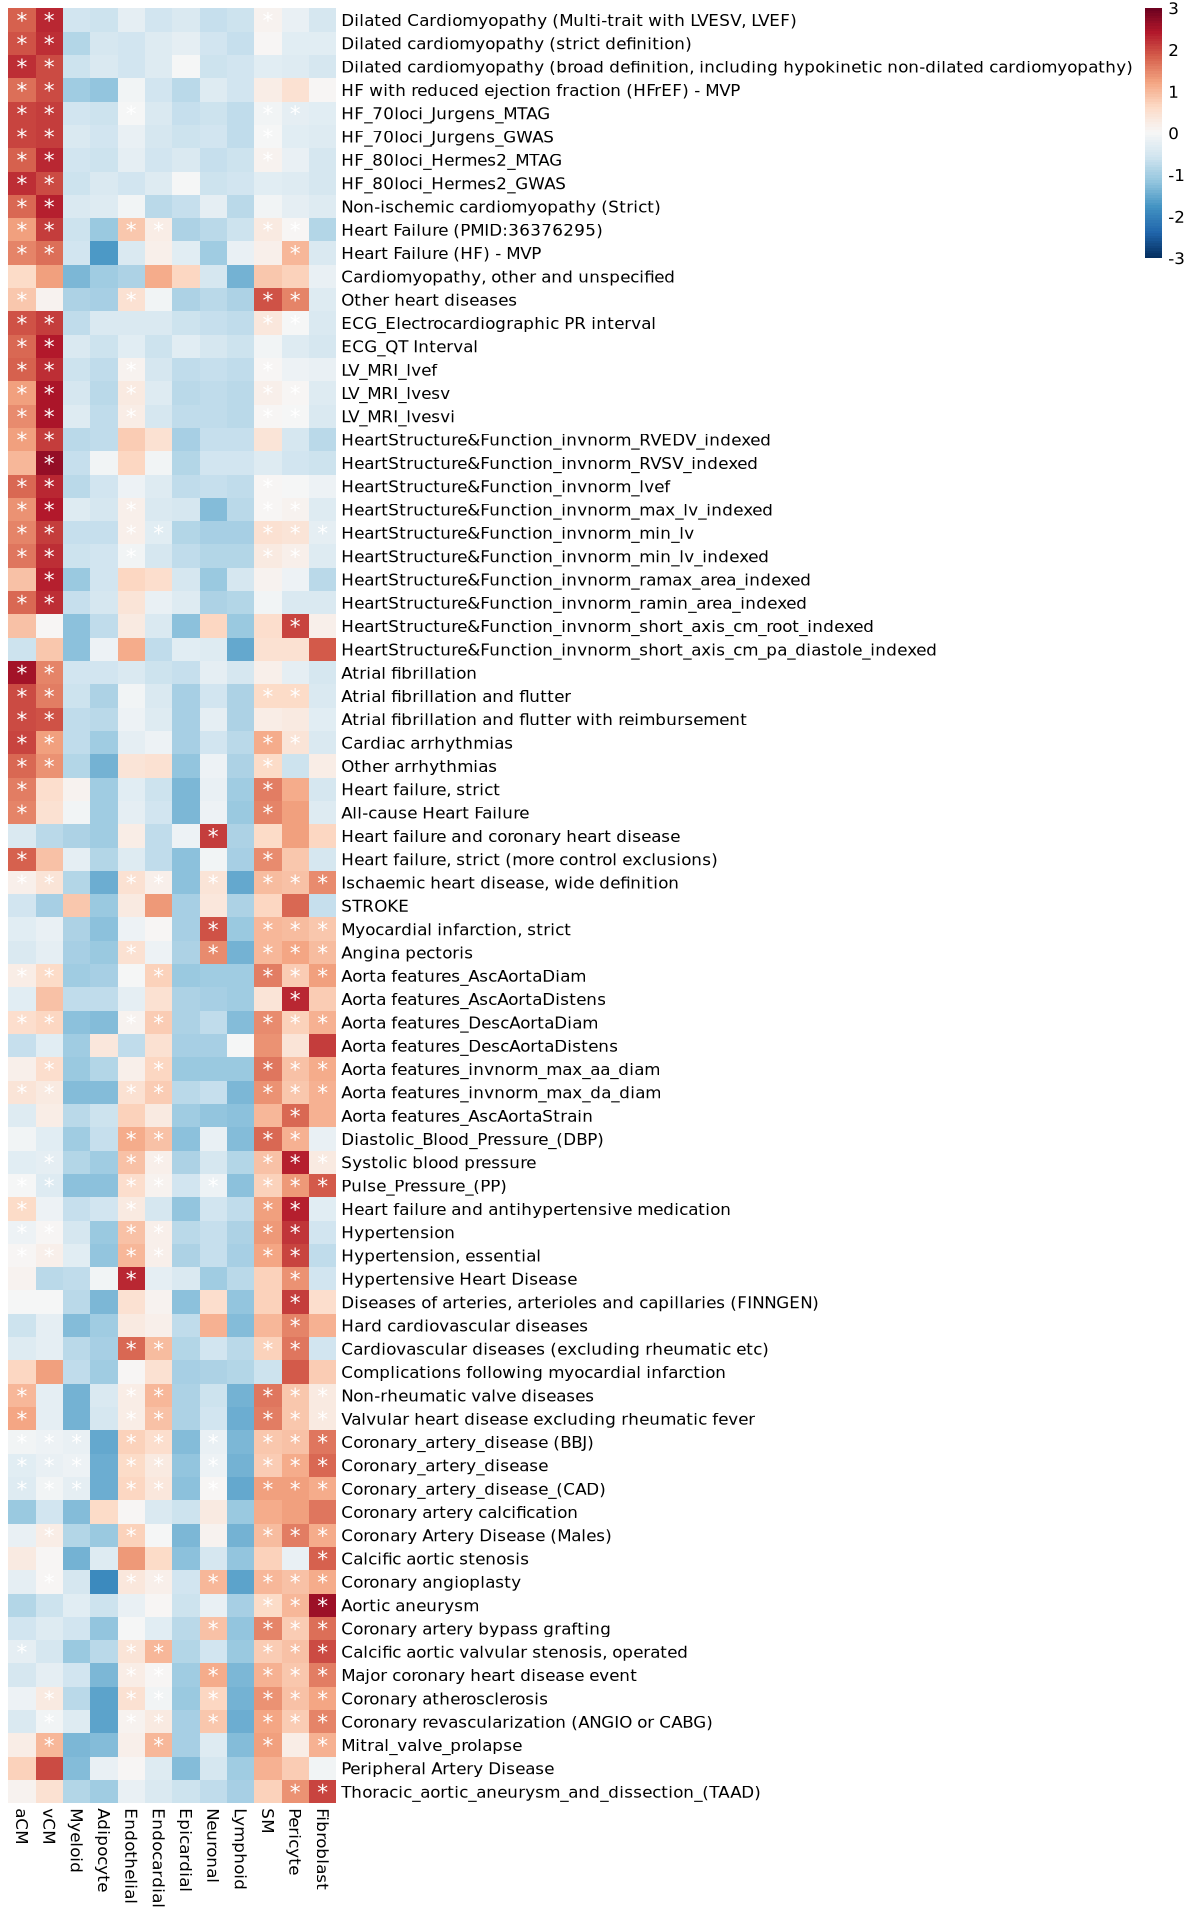

In [193]:
options(repr.plot.width=10, repr.plot.height=16)

# Plot heatmap
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13)

In [156]:
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13,
  filename = "/nfs/lab/projects/mega_heart/Plots_figures/GWAS-Ac_V2.pdf",
  width = 10, height = 17
)

# me3

In [157]:
results_combined = dplyr::filter(results_combined.backup, Histone_mod == "E1")

In [158]:
# Subset the original data based on the filtered traits
results_combined_filtered <- results_combined %>%
  filter(Phenotype %in% traits.use)

In [159]:
results_combined_filtered

trait,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score,file,celltype,Histone_mod,Enrichment_padj_BH,Phenotype,Internal Study ID,File,Priority
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,-20.8496594,9.624265,0.0219629,-7.532318e-07,2.746215e-07,-2.74280039,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.aCM--E1.results,aCM,E1,0.7963077,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,53.9532205,70.611150,0.4440504,1.566691e-06,2.053030e-06,0.76311122,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Adipocyte--E1.results,Adipocyte,E1,0.9314115,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,-11.7363482,27.077440,0.6335487,-5.504128e-07,7.864531e-07,-0.69986724,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Endocardial--E1.results,Endocardial,E1,0.9692806,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,-6.4083179,12.238453,0.5332299,-3.493604e-07,3.525052e-07,-0.99107879,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Endothelial--E1.results,Endothelial,E1,0.9485865,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,-13.6050265,39.956901,0.7122179,-5.516612e-07,1.163417e-06,-0.47417329,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Epicardial--E1.results,Epicardial,E1,0.9774362,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,-0.8053224,13.757077,0.8914657,-1.985251e-07,3.839096e-07,-0.51711414,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Fibroblast--E1.results,Fibroblast,E1,0.9910308,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,15.1837391,28.635983,0.6206171,2.864612e-07,8.696887e-07,0.32938360,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Lymphoid--E1.results,Lymphoid,E1,0.9691249,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,14.0660254,12.528133,0.3058253,2.957816e-07,3.761031e-07,0.78643744,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Myeloid--E1.results,Myeloid,E1,0.9314115,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok
CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf,24.1044132,44.029567,0.5966032,5.055792e-07,1.295007e-06,0.39040654,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf_hg19.Neuronal--E1.results,Neuronal,E1,0.9595721,Coronary artery calcification,CVDKP_3,CAC1000G_EA_FINAL_FULL.sumstats.gwascatalog.ssf.ldsc.sumstats.gz,Ok


In [160]:
plotting_df <- results_combined_filtered %>%
  mutate(log10_p = -log10(Enrichment_p)) %>%
  select(Phenotype, celltype, log10_p) %>%
  pivot_wider(names_from = celltype, values_from = log10_p)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

In [161]:
# Create matrix with reordered rownames
plotting_matrix <- as.matrix(plotting_df[,-1])
rownames(plotting_matrix) <- plotting_df$Phenotype

In [162]:
stars_df <- results_combined_filtered %>%
  select(Phenotype, celltype, Enrichment_padj_BH) %>%
  pivot_wider(names_from = celltype, values_from = Enrichment_padj_BH)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

stars_matrix <- as.matrix(stars_df[,-1])
rownames(stars_matrix) <- stars_df$Phenotype

# Replace values < 0.1 with "*" and > 0 with ""
stars_matrix_plot <- stars_matrix

stars_matrix_plot[stars_matrix_plot < 0.05] <- "*"
stars_matrix_plot[stars_matrix_plot > 0 & stars_matrix_plot >= 0.05] <- ""

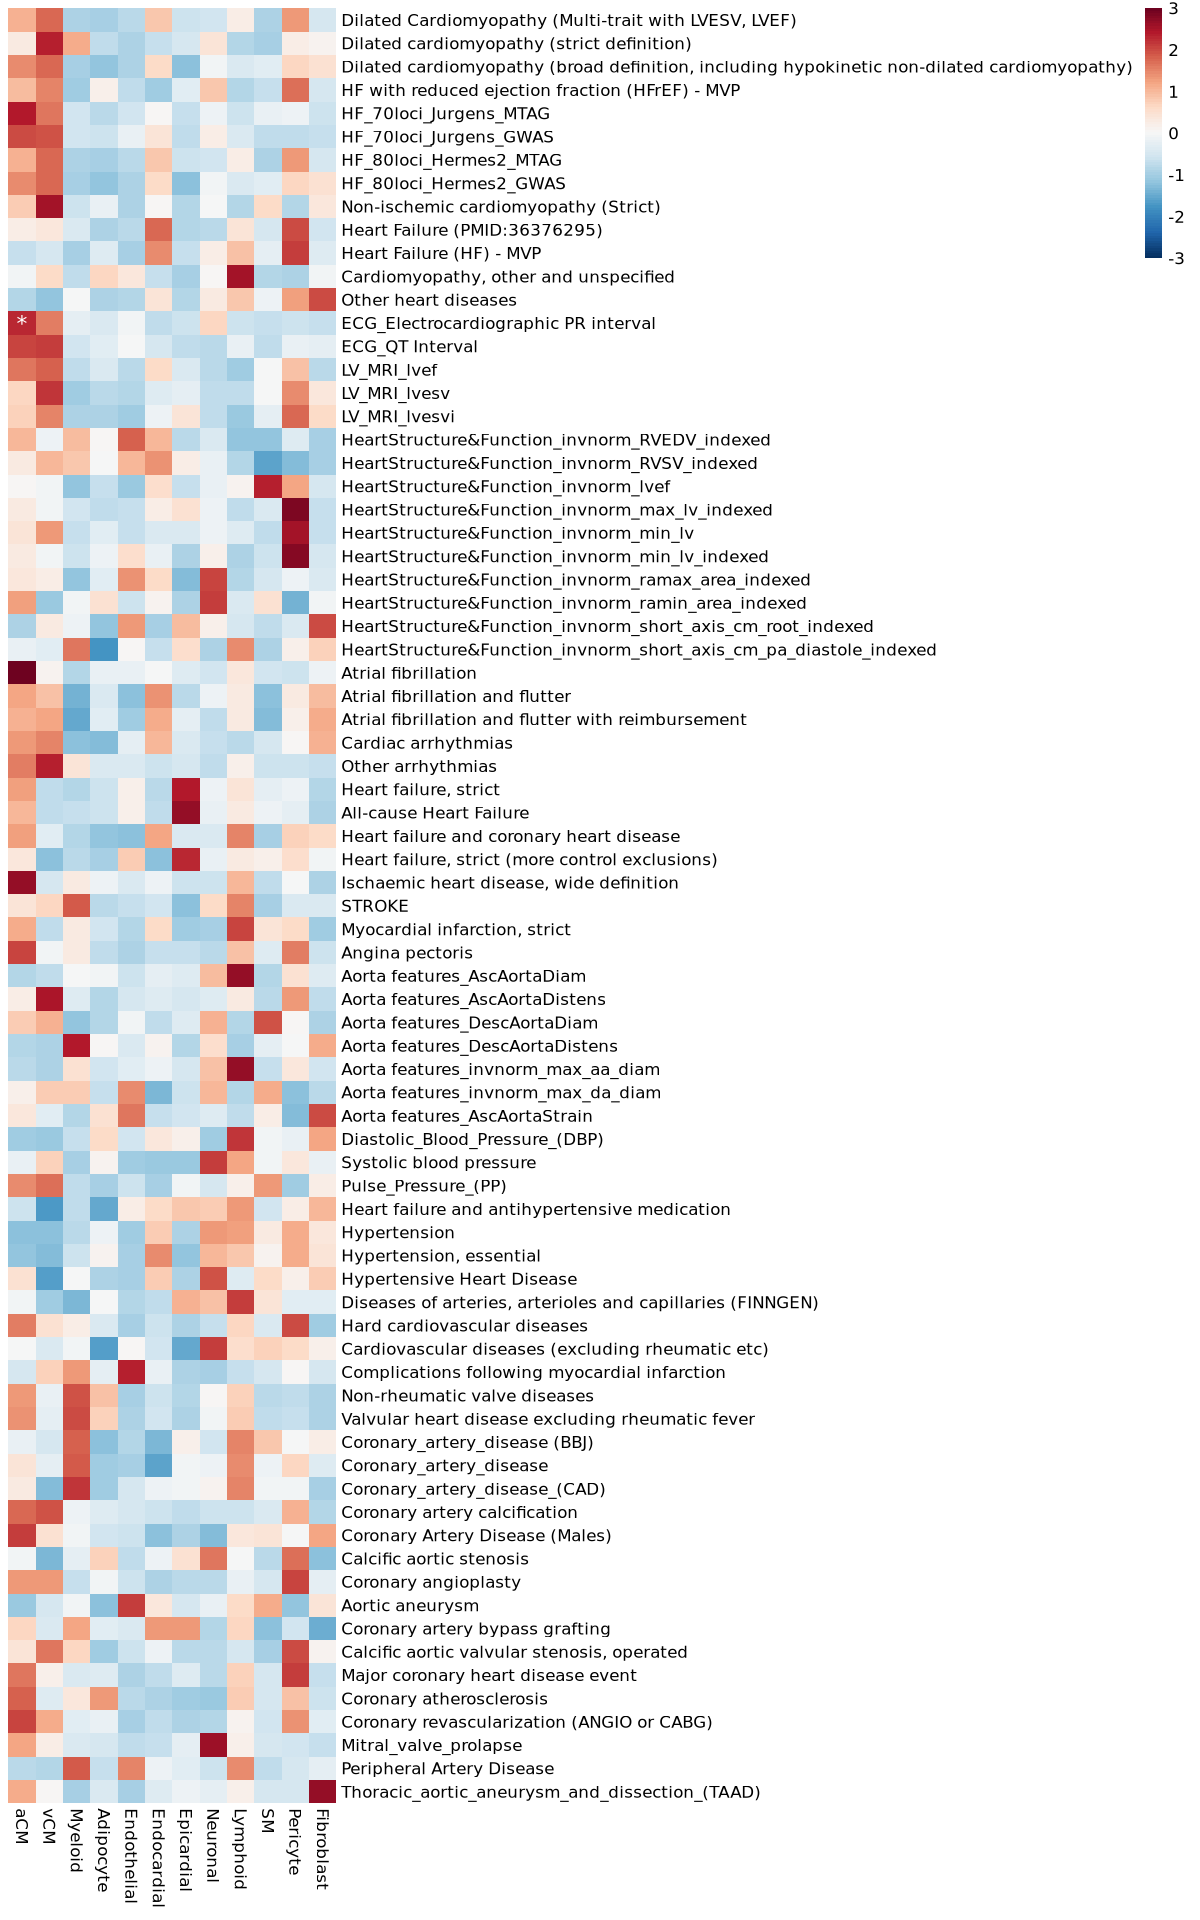

In [163]:
options(repr.plot.width=10, repr.plot.height=16)

# Plot heatmap
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13)

In [164]:
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13,
  filename = "/nfs/lab/projects/mega_heart/Plots_figures/GWAS-Me3-V2.pdf",
  width = 10, height = 17
)

# Open

In [194]:
results_combined = dplyr::filter(results_combined.backup, Histone_mod == "E3")
results_combined$celltype = str_split_fixed(results_combined$celltype, "--", n=2)[,1]

In [195]:
# Subset the original data based on the filtered traits
results_combined_filtered <- results_combined %>%
  filter(Phenotype %in% traits.use)

In [197]:
# Write table for publication - Open
data.write = results_combined_filtered %>%
            dplyr::mutate(chromatin_state = "Open") %>%
            dplyr::select(
             Phenotype, File, celltype, chromatin_state,
             Enrichment, Enrichment_std_error, Enrichment_p, Coefficient, Coefficient_std_error, Enrichment_padj_BH)

write.table(
  data.write, 
  "/nfs/lab/projects/mega_heart/Tables/LDSC/LDSC_Summarystats_Open.txt",
  sep = "\t",            
  quote = FALSE,         
  row.names = FALSE,     
  col.names = TRUE       
)

In [199]:
plotting_df <- results_combined_filtered %>%
  mutate(log10_p = -log10(Enrichment_p)) %>%
  select(Phenotype, celltype, log10_p) %>%
  pivot_wider(names_from = celltype, values_from = log10_p)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

In [200]:
# Create matrix with reordered rownames
plotting_matrix <- as.matrix(plotting_df[,-1])
rownames(plotting_matrix) <- plotting_df$Phenotype

In [201]:
stars_df <- results_combined_filtered %>%
  select(Phenotype, celltype, Enrichment_padj_BH) %>%
  pivot_wider(names_from = celltype, values_from = Enrichment_padj_BH)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

stars_matrix <- as.matrix(stars_df[,-1])
rownames(stars_matrix) <- stars_df$Phenotype

# Replace values < 0.1 with "*" and > 0 with ""
stars_matrix_plot <- stars_matrix

stars_matrix_plot[stars_matrix_plot < 0.05] <- "*"
stars_matrix_plot[stars_matrix_plot > 0 & stars_matrix_plot >= 0.05] <- ""

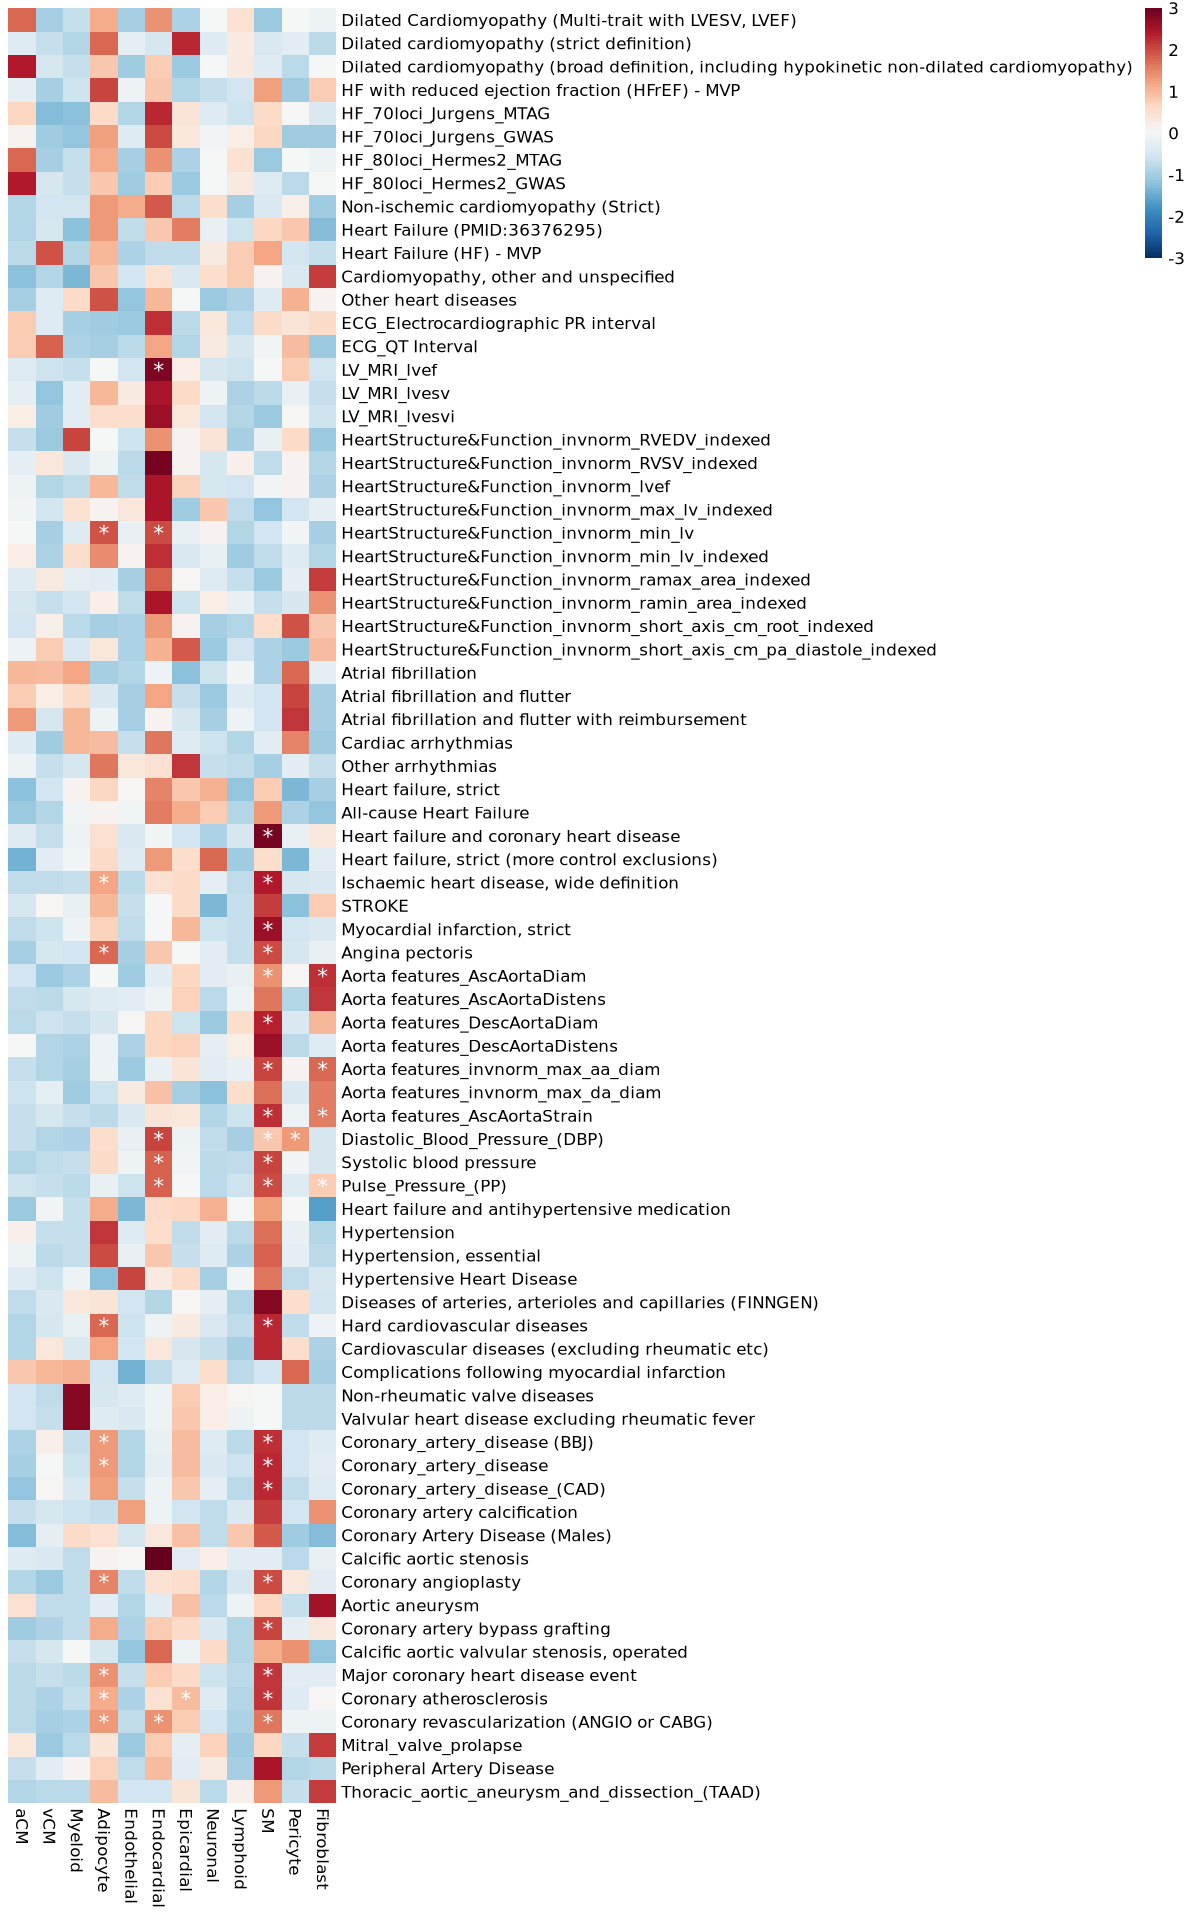

In [202]:
options(repr.plot.width=10, repr.plot.height=16)

# Plot heatmap
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13)

In [172]:
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13,
  filename = "/nfs/lab/projects/mega_heart/Plots_figures/GWAS-OPEN-V2.pdf",
  width = 10, height = 17
)